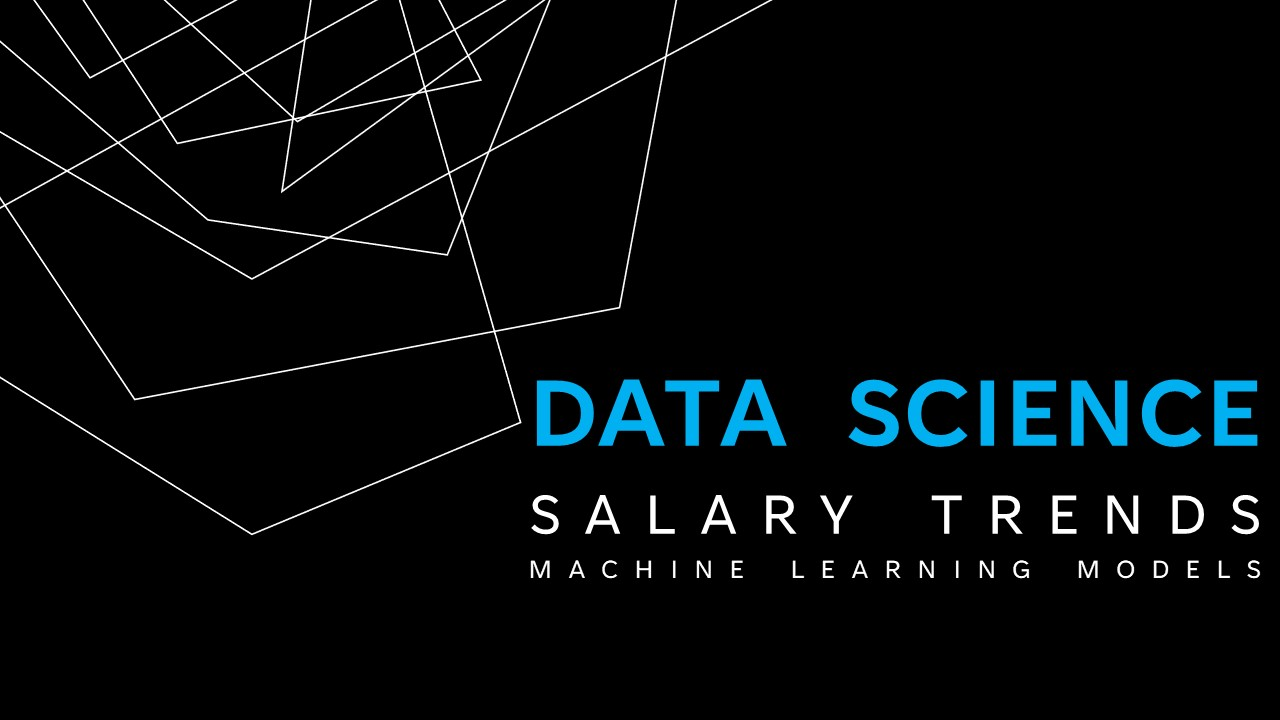

## This Data Science Salary Prediction project leverages machine learning techniques to analyze and predict salaries within the field of Data Science. 
- #### __Objective:__ Predict salaries in data science using machine learning models.
- #### __Preprocessing:__ Handled continuous and categorical variables, segmented salaries into levels.
- #### __Classification Models Used:__ Logistic Regression, LDA, KNN, SVM, RandomForest, and XGBoost.
- #### __Evaluation Metrics:__ Assessed performance using cross-validation score, weighted accuracy, weighted ROC-AUC, and weighted F1-score.
- #### __Outcome:__ Identified key factors influencing salaries and provided insights into trends across job categories.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE

seed=3

# 1. Import the dataset: Load the data into your analysis environment.

In [2]:
df = pd.read_csv(r"C:\00\00-DATA SCIENCE\10-MLDL\MLDL_FinalProject\ds_salaries.csv")

# 2. Display records: Show the first 5 and last 5 records of the dataset.

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# 3. Identify data types: Check and note the data types for each variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


### Dataset Information:
`work_year:` The year the salary was paid <br>
`experience_level:` The experience level in the job during the year <br>
`employment_type:` The type of employment for the role <br>
`job_title:` The role worked in during the year <br>
`salary:` The total gross salary amount paid <br>
`salary_currency:` The currency of the salary paid as an ISO 4217 currency code <br>
`salary_in_usd:` The salary in USD <br>
`employee_residence:` Employee's primary country of residence in during the work year as an ISO 3166 country code <br>
`remote_ratio:` The overall amount of work done remotely <br>
`company_location:` The country of the employer's main office or contracting branch <br>
`company_size:` The median number of people that worked for the company during the year <br>

## *`Value Counts Function`*

In [5]:
def value_counts(df):
    for col in df.columns:
        print(df[col].value_counts())
        print("="*50)

In [6]:
value_counts(df)

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64
experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64
salary
100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: count, Length: 815, dtype: int64
salary_

### From the value counts, we could see 'salary' and 'salary_in_usd' are numerical variables. Others are categorical variabels.

# __`DATA CLEANING & PREPARATION`__

# 4. Missing entries: Determine the number of missing entries per variable.

In [7]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### There are no missing values in this dataset.

# 5. Duplicate records: Identify and count any duplicate records.

In [5]:
df.duplicated().sum()

1171

### The dataset contains 1,171 duplicated observations that need to be removed.

In [6]:
df.drop_duplicates(inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [10]:
for col in df.columns:
    print(f"{col}:", df[col].nunique())
    print("-🔹-"*10)

work_year: 4
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
experience_level: 4
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
employment_type: 4
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
job_title: 93
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
salary: 815
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
salary_currency: 20
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
salary_in_usd: 1035
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
employee_residence: 78
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
remote_ratio: 3
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
company_location: 72
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-
company_size: 3
-🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹--🔹-


### The `'job_title'` variable contains too many levels and will need to be reorganized to facilitate further analysis.

In [11]:
pd.set_option('display.max_rows',100)
df.job_title.value_counts()

job_title
Data Engineer                               598
Data Scientist                              538
Data Analyst                                396
Machine Learning Engineer                   206
Analytics Engineer                           91
Research Scientist                           65
Data Architect                               64
Data Science Manager                         52
ML Engineer                                  34
Research Engineer                            33
Applied Scientist                            31
Machine Learning Scientist                   26
Data Science Consultant                      23
Data Manager                                 23
Computer Vision Engineer                     18
Data Analytics Manager                       18
AI Scientist                                 16
BI Data Analyst                              15
Business Data Analyst                        15
Data Specialist                              12
Applied Machine Learning Scien

In [7]:
group_mapping = {
    'ML Engineer': 'Machine Learning Engineer',
    'Data Science Consultant': 'Data Scientist',
    'Data Manager': 'Others_Manager/Head/Lead',
    'Computer Vision Engineer': 'Others_Engineer',
    'Data Analytics Manager': 'Others_Manager/Head/Lead',
    'AI Scientist': 'Others_Scientist',
    'BI Data Analyst': 'Others_Analyst',
    'Business Data Analyst': 'Others_Analyst',
    'Data Specialist': 'Others_Specialist/Researcher/Strategist',
    'Applied Machine Learning Scientist': 'Machine Learning Scientist',
    'Big Data Engineer': 'Others_Engineer',
    'BI Developer': 'Others_Developer',
    'AI Developer': 'Others_Developer',
    'Director of Data Science': 'Others_Manager/Head/Lead',
    'Machine Learning Infrastructure Engineer': 'Machine Learning Engineer',
    'Head of Data': 'Others_Manager/Head/Lead',
    'Applied Data Scientist': 'Others_Scientist',
    'Machine Learning Software Engineer': 'Machine Learning Engineer',
    'Lead Data Scientist': 'Others_Manager/Head/Lead',
    'Head of Data Science': 'Others_Manager/Head/Lead',
    'BI Analyst': 'Others_Analyst',
    'Data Science Lead': 'Others_Manager/Head/Lead',
    'Principal Data Scientist': 'Others_Manager/Head/Lead',
    'NLP Engineer': 'Others_Engineer',
    'ETL Developer': 'Others_Developer',
    'Machine Learning Developer': 'Others_Developer',
    'Data Infrastructure Engineer': 'Others_Engineer',
    'Data Analytics Engineer': 'Others_Engineer',
    'Data Operations Engineer': 'Others_Engineer',
    'Lead Data Engineer': 'Others_Manager/Head/Lead',
    'Deep Learning Engineer': 'Others_Engineer',
    'Product Data Analyst': 'Others_Analyst',
    'Cloud Database Engineer': 'Others_Engineer',
    'Data Science Engineer': 'Data Engineer',
    'Computer Vision Software Engineer': 'Others_Engineer',
    'Machine Learning Researcher': 'Others_Specialist/Researcher/Strategist',
    'Lead Data Analyst': 'Others_Manager/Head/Lead',
    'Data Quality Analyst': 'Others_Analyst',
    'Business Intelligence Engineer': 'Others_Engineer',
    'Machine Learning Research Engineer': 'Machine Learning Engineer',
    'MLOps Engineer': 'Others_Engineer',
    '3D Computer Vision Researcher': 'Others_Specialist/Researcher/Strategist',
    'Data Operations Analyst': 'Others_Analyst',                     
    'Lead Machine Learning Engineer': 'Others_Manager/Head/Lead',               
    'Machine Learning Manager': 'Others_Manager/Head/Lead',                      
    'Financial Data Analyst': 'Others_Analyst',                        
    'Cloud Data Engineer': 'Others_Engineer',                            
    'Data Analytics Consultant': 'Others_Analyst',
    'Data Scientist Lead': 'Others_Manager/Head/Lead',                          
    'Data Lead': 'Others_Manager/Head/Lead',                                     
    'Data Analytics Lead': 'Others_Manager/Head/Lead',                           
    'Data Modeler': 'Others_Engineer',                                  
    'Principal Data Analyst': 'Others_Manager/Head/Lead',                       
    'Big Data Architect': 'Others_Engineer',                             
    'Autonomous Vehicle Technician': 'Others_Engineer',                 
    'Software Data Engineer': 'Others_Engineer',                        
    'AI Programmer': 'Others_Engineer',                                 
    'ETL Engineer': 'Others_Engineer',                                  
    'Principal Data Engineer':'Others_Manager/Head/Lead',                       
    'Marketing Data Analyst': 'Others_Analyst',                        
    'Applied Machine Learning Engineer': 'Machine Learning Engineer',            
    'Data Analytics Specialist': 'Others_Specialist/Researcher/Strategist',                       
    'Data Strategist': 'Others_Specialist/Researcher/Strategist',                               
    'Insight Analyst': 'Others_Analyst',                               
    'Head of Machine Learning': 'Others_Manager/Head/Lead',                      
    'Principal Data Architect': 'Others_Manager/Head/Lead',                      
    'Staff Data Scientist': 'Others_Manager/Head/Lead',                         
    'Product Data Scientist': 'Others_Specialist/Researcher/Strategist',                        
    'Cloud Data Architect': 'Others_Engineer',                         
    'BI Data Engineer': 'Others_Engineer',                              
    'Power BI Developer': 'Others_Developer',                            
    'Data Science Tech Lead': 'Others_Manager/Head/Lead',                        
    'Data Management Specialist': 'Others_Specialist/Researcher/Strategist',                   
    'Principal Machine Learning Engineer': 'Others_Manager/Head/Lead',           
    'Manager Data Management': 'Others_Manager/Head/Lead',                       
    'Marketing Data Engineer': 'Others_Engineer',                        
    'Azure Data Engineer': 'Others_Engineer',                            
    'Compliance Data Analyst': 'Others_Analyst',                        
    'Deep Learning Researcher': 'Others_Specialist/Researcher/Strategist',                       
    'Staff Data Analyst': 'Others_Manager/Head/Lead',                            
    'Data DevOps Engineer': 'Others_Engineer',                           
    'Finance Data Analyst': 'Others_Analyst',  
    'Research Engineer': 'Others_Engineer',
    'Applied Scientist': 'Others_Scientist' 
}

df['job_category'] = df['job_title'].map(group_mapping).fillna(df['job_title'])
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Others_Manager/Head/Lead
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Machine Learning Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Machine Learning Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Data Scientist
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,Others_Manager/Head/Lead
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,Data Scientist
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,Others_Analyst


In [8]:
df.job_category.value_counts()

job_category
Data Engineer                              603
Data Scientist                             561
Data Analyst                               396
Machine Learning Engineer                  267
Others_Engineer                            131
Others_Manager/Head/Lead                   130
Analytics Engineer                          91
Research Scientist                          65
Others_Analyst                              64
Data Architect                              64
Others_Scientist                            57
Data Science Manager                        52
Machine Learning Scientist                  38
Others_Developer                            37
Others_Specialist/Researcher/Strategist     28
Name: count, dtype: int64

In [9]:
df['job_category'] = df['job_category'].map({
    'Machine Learning Engineer': 'Data Engineer',
    'Others_Engineer': 'Data Engineer',
    'Others_Manager/Head/Lead': 'Manager/Head/Lead',
    'Analytics Engineer': 'Data Engineer',
    'Research Scientist': 'Data Scientist',
    'Others_Analyst': 'Data Analyst',
    'Data Architect': 'Data Engineer',
    'Others_Scientist': 'Data Scientist',
    'Data Science Manager': 'Manager/Head/Lead',
    'Machine Learning Scientist': 'Data Scientist',
    'Others_Developer': 'Data Engineer',
    'Others_Specialist/Researcher/Strategist': 'Data Analyst'
}).fillna(df['job_category'])

df['job_category'].value_counts()

job_category
Data Engineer        1193
Data Scientist        721
Data Analyst          488
Manager/Head/Lead     182
Name: count, dtype: int64

### A new column, `'job_category'`, has been created, containing four levels for simplified categorization.

In [15]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
2672,2022,SE,FT,Data Scientist,198440,USD,198440,US,100,US,M,Data Scientist
3657,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S,Manager/Head/Lead
3110,2022,SE,FT,Data Scientist,92000,USD,92000,US,100,US,L,Data Scientist
475,2023,SE,FT,Data Analyst,80000,USD,80000,US,100,US,M,Data Analyst
3265,2022,SE,FT,Data Analyst,84900,USD,84900,US,100,US,M,Data Analyst
1912,2022,MI,FT,Data Analyst,60000,USD,60000,US,100,US,M,Data Analyst
1321,2023,SE,FT,Computer Vision Software Engineer,50000,EUR,53654,NL,100,CA,L,Data Engineer
3350,2022,MI,FT,Data Engineer,206699,USD,206699,US,0,US,M,Data Engineer
3039,2022,SE,FT,Data Science Manager,140100,USD,140100,US,100,US,L,Manager/Head/Lead
2609,2022,SE,FT,Data Scientist,88100,USD,88100,US,0,US,M,Data Scientist


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
 11  job_category        2584 non-null   object
dtypes: int64(4), object(8)
memory usage: 262.4+ KB


# 6. Univariate Analysis: Conduct this analysis on all variables, creating appropriate visualizations.

## 1) Numerical Variables:
###  🔴 `salary` | `salary_in_usd` 

In [17]:
col_num = ['salary', 'salary_in_usd']

In [18]:
df[col_num].describe().round(2)

,salary,salary_in_usd
count,2584.00,2584.00
mean,210365.30,133409.28
std,808037.54,67136.84
min,6000.00,5132.00
25%,90000.00,84975.00
50%,134630.00,130000.00
75%,182562.50,175000.00
max,30400000.00,450000.00


In [19]:
cv = df[col_num].std()/df[col_num].mean()
cv

salary           3.841116
salary_in_usd    0.503240
dtype: float64

In [20]:
df[col_num].skew()

salary           24.088574
salary_in_usd     0.620317
dtype: float64

## *`Numerical Variable Visualization Function`*

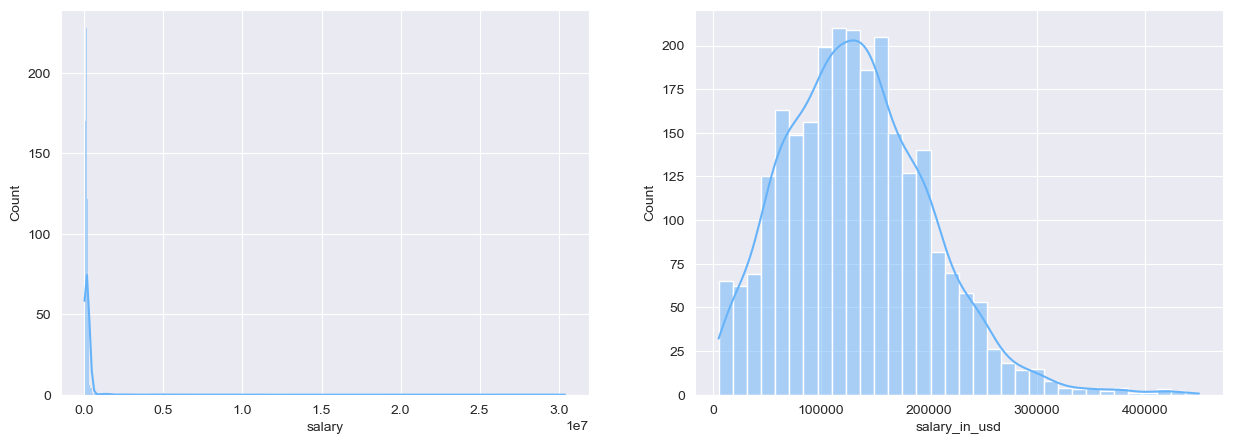

In [21]:
def num_histplot(df,row,col):
    fig, axes = plt.subplots(row,col, figsize=(15,5))
    axes = axes.flatten()

    for i, val in enumerate(df[col_num]):
        sns.histplot(data=df, x=val, ax=axes[i], kde=True, color='#67B3FA')
    plt.show()

sns.set_style("darkgrid")
num_histplot(df,1,2)

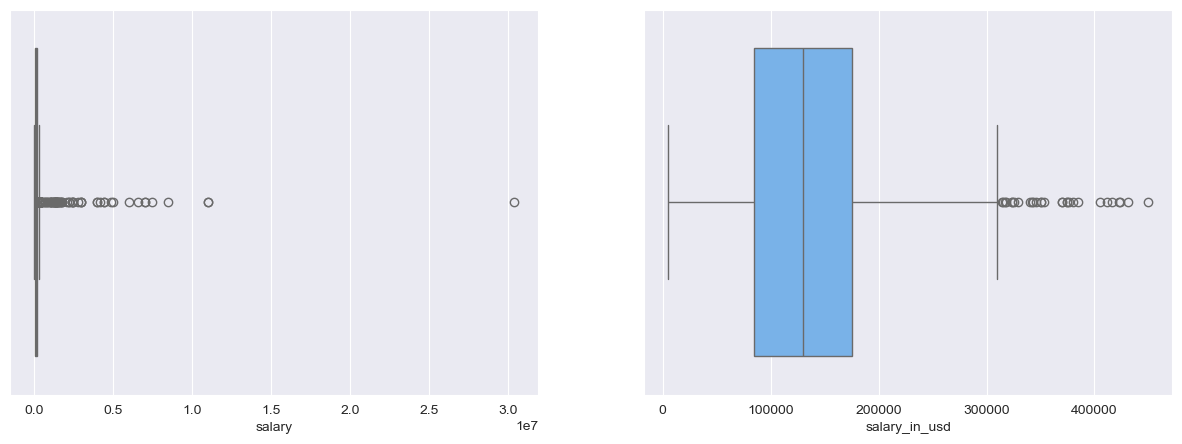

In [22]:
def num_boxplot(df,row,col):
    fig, axes = plt.subplots(row,col, figsize=(15,5))
    axes = axes.flatten()

    for i, val in enumerate(df[col_num]):
        sns.boxplot(data=df, x=val,ax=axes[i],color='#67B3FA')
    plt.show()

sns.set_style("darkgrid")
num_boxplot(df,1,2)

### The `'salary'` variable exhibits large variance because of differences in currencies across countries.
### The `'salary_in_usd'` variable is a continuous numerical variable and appears to be slightly right-skewed.

## 2) Categorical Variables:

## *`Categorical Variable Visualization Function`*

In [31]:
def cat_visual(df,col):
    ax = sns.countplot(data=df, x=col, hue=col, palette="viridis")
    for cnts in ax.containers:
        ax.bar_label(cnts, fontsize=10)
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        if ax.legend_:
            ax.legend_.remove()
        ax.spines['top'].set_linewidth(1.2) 
        ax.spines['right'].set_linewidth(1.2) 
        ax.spines['left'].set_linewidth(1.2) 
        ax.spines['bottom'].set_linewidth(1.2)
            
    sns.set_style("darkgrid")    
    plt.show()


In [32]:
col_cat = ['work_year', 'experience_level', 'employment_type', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size', 'job_title', 'job_category']

###  🔴 work_year

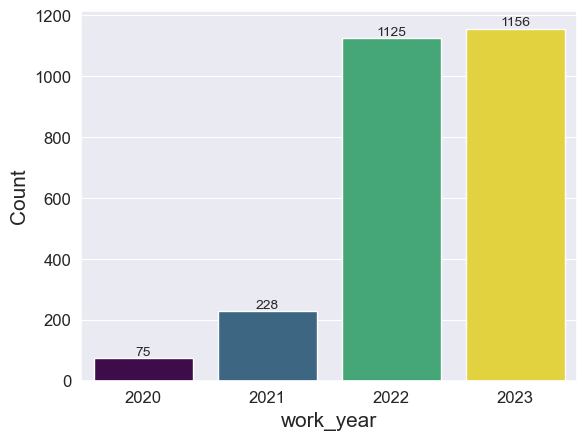

In [34]:
cat_visual(df, 'work_year')

#### The `'work_year'` variable contains four discrete values ranging from 2020 to 2023, with the majority of observations concentrated in 2022 and 2023.

###  🔴 experience_level

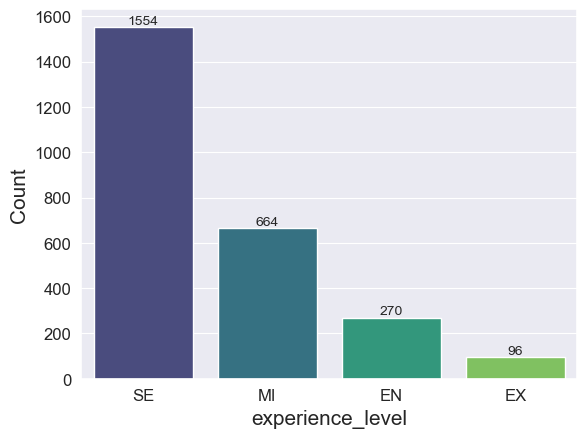

In [35]:
cat_visual(df,'experience_level')

#### `'SE': Senior` `'MI': Mid-Level` `'EN': Entry-Level` `'EX': Executive-Level`
### The majority of the observations fall into the 'SE'(Senior) category, with 1,554 counts.

###  🔴 employment_type

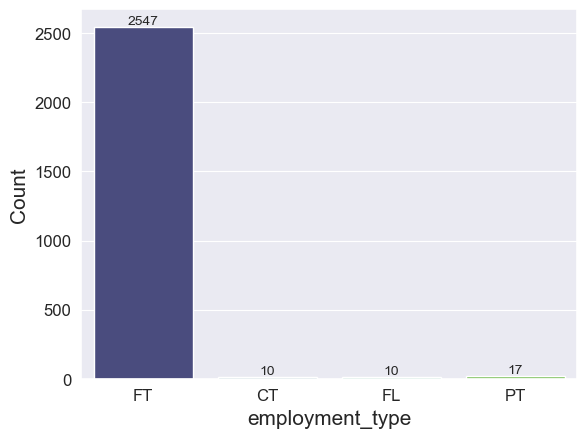

In [36]:
cat_visual(df, 'employment_type')

#### `'PT': 'Part-Time'` `'FT': 'Full-Time'` `'CT': 'Contract'` `'FL':'Freelance'`
### The majority of observations are categorized as `FT(full-time)` employment with 2,547 counts, while other employment types (CT, FL, and PT) have significantly fewer observations, each with fewer than 20 counts.

###  🔴 remote_ratio

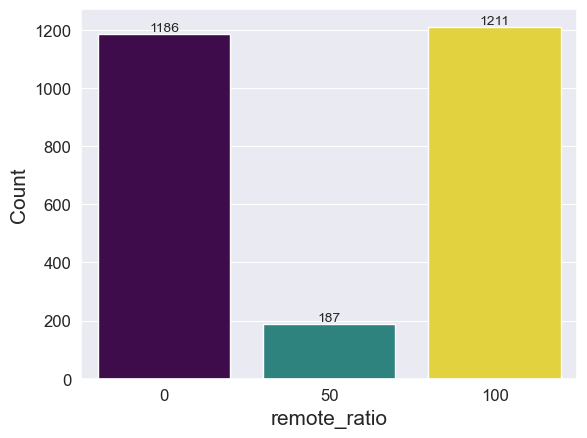

In [37]:
cat_visual(df, 'remote_ratio')

### The `'remote_ratio'` variable has three values, indicating that most people either work from home `100%` or in the office `0%`, with only a small portion in a hybrid mode `50%`.

###  🔴 company_size

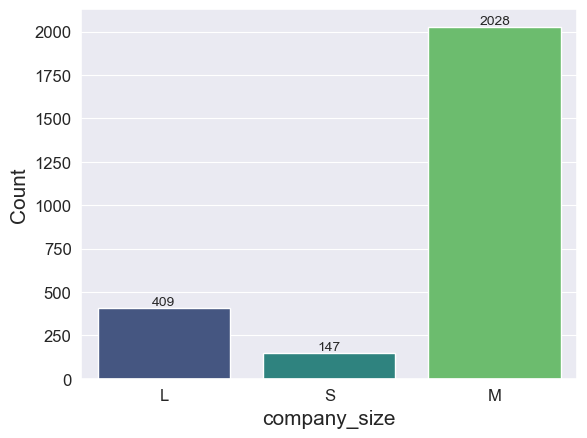

In [38]:
cat_visual(df, 'company_size')

#### `'L': 'Large'` `'S': 'Small'` `'M': 'Median'`
### The majority of observations are from medium-sized companies (`M`, 2,028 counts), followed by large companies (`L`, 409 counts), with small companies (`S`, 147 counts) being the least represented.

###  🔴 company_location

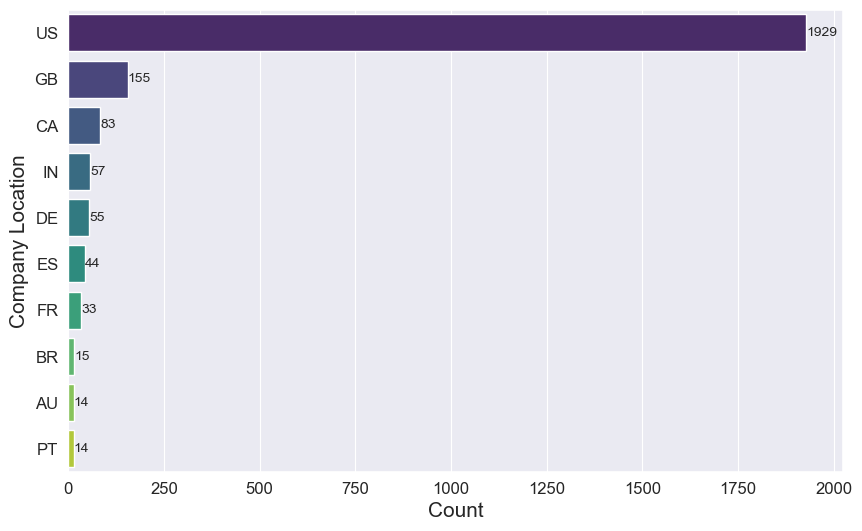

In [39]:
plt.figure(figsize=(10,6))

top_10_locations = df['company_location'].value_counts().head(10).reset_index()
top_10_locations.columns = ['company_location', 'count']
ax = sns.barplot(data=top_10_locations, x='count', y='company_location', hue='company_location', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
    plt.xlabel('Count',fontsize=15)
    plt.ylabel('Company Location', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax.spines['top'].set_linewidth(1.2) 
    ax.spines['right'].set_linewidth(1.2) 
    ax.spines['left'].set_linewidth(1.2) 
    ax.spines['bottom'].set_linewidth(1.2)

plt.show()

### The majority of companies are located in the US (1,929).

###  🔴 employee_residence

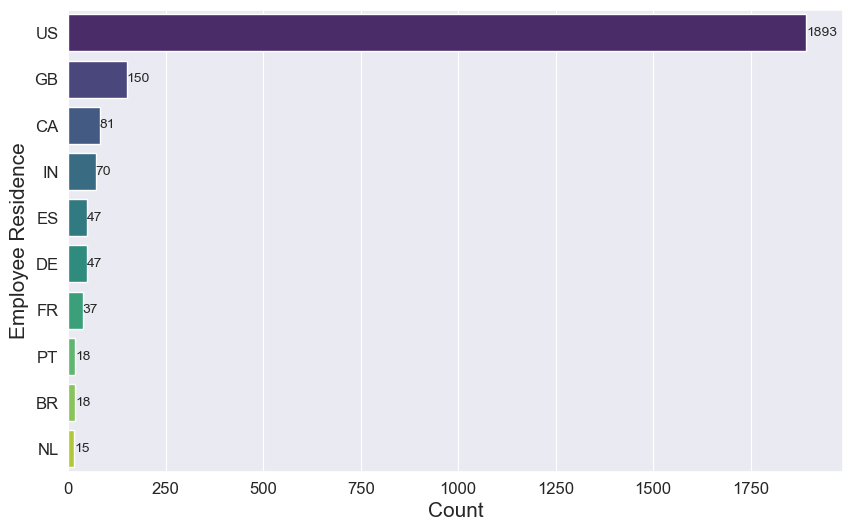

In [40]:
plt.figure(figsize=(10,6))

top_10_residence = df['employee_residence'].value_counts().head(10).reset_index()
top_10_residence.columns = ['employee_residence', 'count']
ax = sns.barplot(data=top_10_residence, x='count', y='employee_residence', hue='employee_residence', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
    plt.xlabel('Count',fontsize=15)
    plt.ylabel('Employee Residence', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax.spines['top'].set_linewidth(1.2) 
    ax.spines['right'].set_linewidth(1.2) 
    ax.spines['left'].set_linewidth(1.2) 
    ax.spines['bottom'].set_linewidth(1.2)

plt.show()

### The majority of employees reside in the US (1,893).

###  🔴 salary_currency

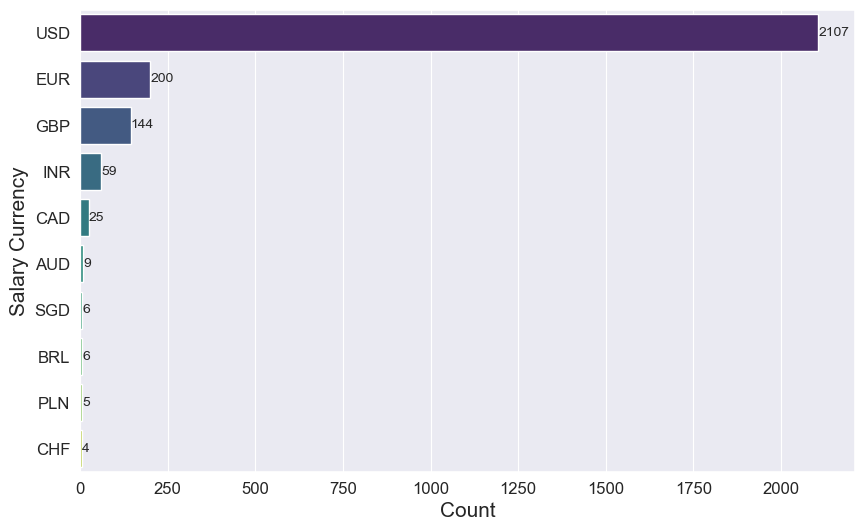

In [41]:
plt.figure(figsize=(10,6))

top_10_currency = df['salary_currency'].value_counts().head(10).reset_index()
top_10_currency.columns = ['salary_currency', 'count']
ax = sns.barplot(data=top_10_currency, x='count', y='salary_currency', hue='salary_currency', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
    plt.xlabel('Count',fontsize=15)
    plt.ylabel('Salary Currency', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax.spines['top'].set_linewidth(1.2) 
    ax.spines['right'].set_linewidth(1.2) 
    ax.spines['left'].set_linewidth(1.2) 
    ax.spines['bottom'].set_linewidth(1.2)

plt.show()

###  🔴 job_category

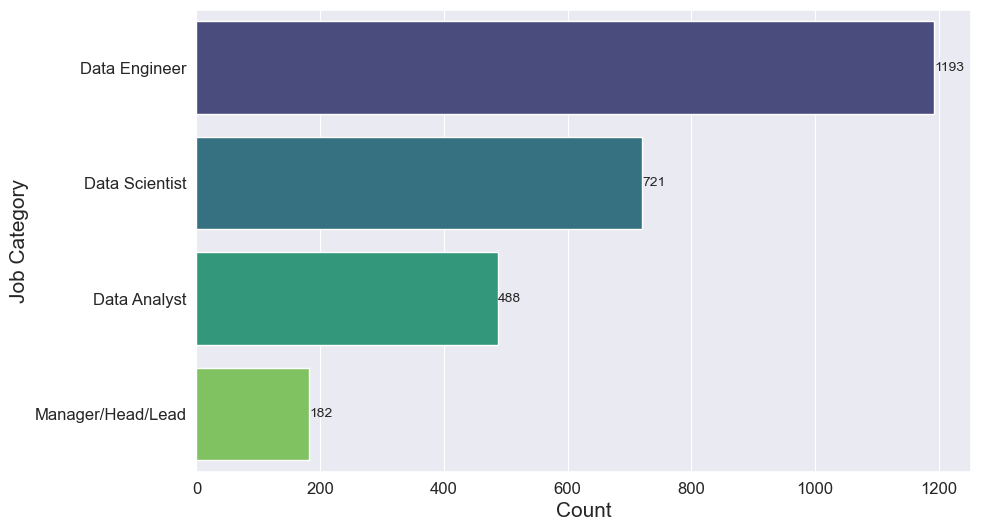

In [43]:
plt.figure(figsize=(10,6))

job_counts = df['job_category'].value_counts().reset_index()
job_counts.columns = ['Job Category', 'Count']
ax = sns.barplot(data=job_counts, x='Count', y='Job Category', hue='Job Category', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
    plt.xlabel('Count',fontsize=15)
    plt.ylabel('Job Category', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax.spines['top'].set_linewidth(1.2) 
    ax.spines['right'].set_linewidth(1.2) 
    ax.spines['left'].set_linewidth(1.2) 
    ax.spines['bottom'].set_linewidth(1.2)

plt.show()

###  🔴 job_title

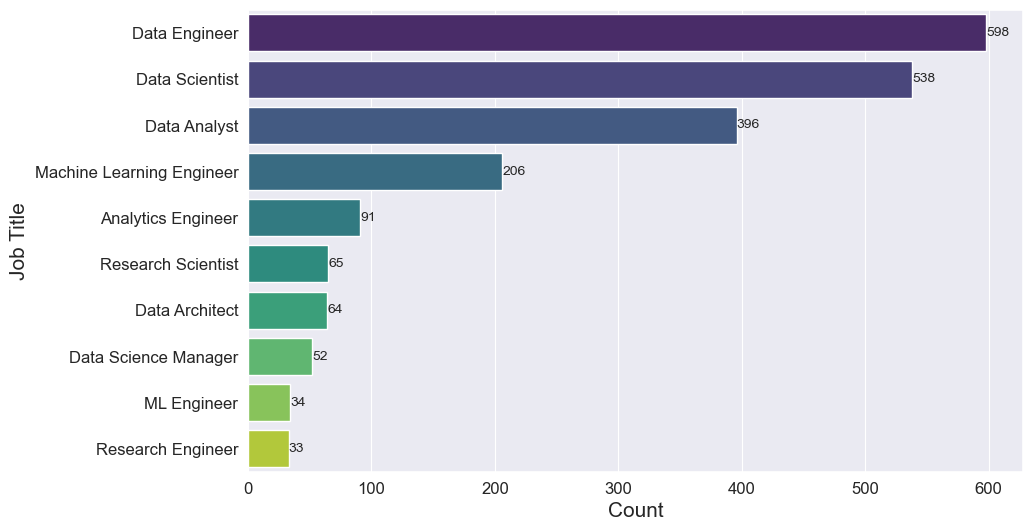

In [42]:
plt.figure(figsize=(10,6))

top_10_jobs = df['job_title'].value_counts().head(10).reset_index()
top_10_jobs.columns = ['job_title', 'count']
ax = sns.barplot(data=top_10_jobs, x='count', y='job_title', hue='job_title', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
    plt.xlabel('Count',fontsize=15)
    plt.ylabel('Job Title', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    ax.spines['top'].set_linewidth(1.2) 
    ax.spines['right'].set_linewidth(1.2) 
    ax.spines['left'].set_linewidth(1.2) 
    ax.spines['bottom'].set_linewidth(1.2)

plt.show()

### After the preliminary univariate analysis, I will convert the values in `'employment_type' to '0' (not Full Time) and '1' (Full Time)`. Similarly, I will transform the values in `'employee_residence' and 'company_location' to '0' (not in the US) and '1' (US)`, and the values in `'remote_ratio' to 'Office' (0), 'Hybrid' (50), and 'Home' (100)`.

### Since I created the job_category from job_title, the job_title column can be removed.

In [10]:
df['employment_type'] = df['employment_type'].apply(lambda i: 1 if i=='FT' else 0)
df['employee_residence'] = df ['employee_residence'].apply(lambda i: 1 if i=='US' else 0)
df['company_location'] = df['company_location'].apply(lambda i: 1 if i=='US' else 0)
df['remote_ratio'] = df['remote_ratio'].map({0:'Office', 50:'Hybrid', 100:'Home'})

In [11]:
df = df.rename(columns=({'employment_type':'full_time',
                         'employee_residence':'employee_residence(US)', 
                         'company_location':'company_location(US)',
                         'remote_ratio': 'remote'
                        }))

In [12]:
df = df.drop('job_title', axis=1)

In [13]:
df

,work_year,experience_level,full_time,salary,salary_currency,salary_in_usd,employee_residence(US),remote,company_location(US),company_size,job_category
0,2023,SE,1,80000,EUR,85847,0,Home,0,L,Manager/Head/Lead
1,2023,MI,0,30000,USD,30000,1,Home,1,S,Data Engineer
2,2023,MI,0,25500,USD,25500,1,Home,1,S,Data Engineer
3,2023,SE,1,175000,USD,175000,0,Home,0,M,Data Scientist
4,2023,SE,1,120000,USD,120000,0,Home,0,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,1,412000,USD,412000,1,Home,1,L,Data Scientist
3751,2021,MI,1,151000,USD,151000,1,Home,1,L,Manager/Head/Lead
3752,2020,EN,1,105000,USD,105000,1,Home,1,S,Data Scientist
3753,2020,EN,0,100000,USD,100000,1,Home,1,L,Data Analyst


In [48]:
value_counts(df)

work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64
full_time
1    2547
0      37
Name: count, dtype: int64
salary
100000    70
120000    59
150000    58
200000    48
80000     46
          ..
126277     1
153088     1
323300     1
200160     1
412000     1
Name: count, Length: 815, dtype: int64
salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64
salary_in_usd
100000    58
150000    56
120000    51
200000    47
130000    39
          ..
314100     1
195800     1
262500     1
209450     1
94665      1
Name: count, Length: 1035, dtype: int64
employee_residence(US)
1    1893
0     691
Name: count, dtype: int64
remote
Home      1211
Office    

# 7. Outlier detection: Use the Local Outlier Factor (LOF) method to identify outliers. Refer this link for LOF method - https://dataheroes.ai/blog/outlier-detection-methods-every-data-enthusiast-must-know/

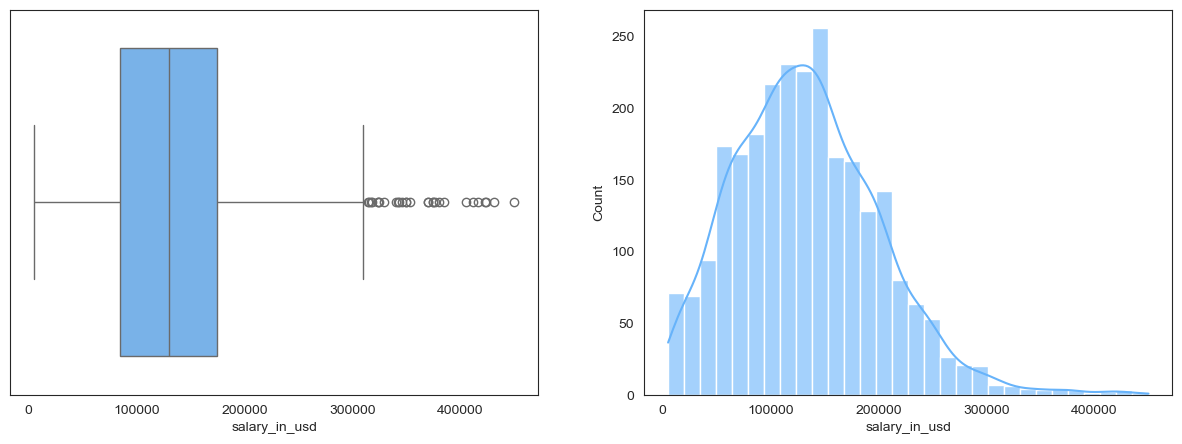

In [50]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(x=df['salary_in_usd'], ax=ax[0], color='#67B3FA')
sns.histplot(df['salary_in_usd'], ax=ax[1], bins=30, kde=True, color='#67B3FA', edgecolor='white', alpha=0.6)
sns.set_style("white")  
plt.show()

In [51]:
df['salary_in_usd'].describe()

count      2584.000000
mean     133409.280186
std       67136.837329
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

#### 🔴Method 1: `CHEBYCHEV'S RULE`

In [52]:
def std_outliers(df,col,threshold):
    mean, std = df[col].mean(), df[col].std()
    cut_off = std*threshold
    lower, upper = mean-cut_off, mean+cut_off
    print('The lower bound value is:', lower)
    print('The upper bound value is:', upper)

    df_lower = df[df[col] < lower]
    df_upper = df[df[col] > upper]
    print(f'Total number of outliers in column "{col}" are:', df_lower.shape[0]+df_upper.shape[0])

    plt.figure(figsize=(6,4))
    sns.histplot(df[col], edgecolor='white', kde=False)
    plt.axvspan(xmin=lower, xmax=df[col].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=df[col].max(), alpha=0.2, color='red')
    sns.set_style("white")  
    plt.show()


The lower bound value is: -68001.23180199211
The upper bound value is: 334819.79217350914
Total number of outliers in column "salary_in_usd" are: 21


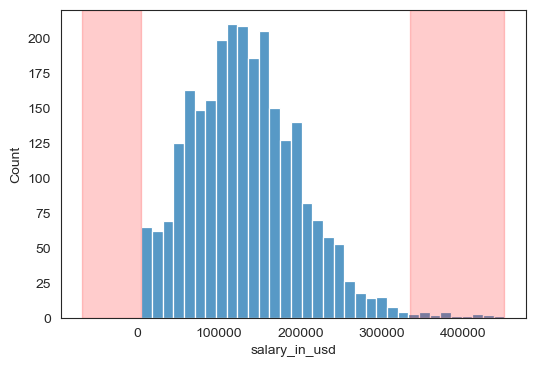

In [54]:
std_outliers(df,'salary_in_usd',3)

#### 🔴Method 2: `IQR Method(Tukey Method)`

- `lower inner fence: Q1 - 1.5*IQR` <br>
- `upper inner fence: Q3 + 1.5*IQR` <br>
- `lower outer fence: Q1 - 3*IQR` <br>
- `upper outer fence: Q3 + 3*IQR` <br>

##### Data values that lie between the inner and outer fences are considered possible outliers;  those that lie outside the outer fences are considered probable outliers or extreme outlier

In [55]:
def turkey_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_outer_fence = Q1-3*IQR
    upper_outer_fence = Q3+3*IQR
    df_outliers = df[(df[col]<lower_outer_fence) | (df[col]>upper_outer_fence)]

    print('The lower bound value is:', lower_outer_fence)
    print('The upper bound value is:', upper_outer_fence)
    print(f'Total number of outliers in column "{col}" are:', df_outliers.shape[0])

    plt.figure(figsize=(6,4))
    sns.histplot(df[col], edgecolor='white', kde=False)
    plt.axvspan(xmin=lower_outer_fence, xmax=df[col].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper_outer_fence, xmax=df[col].max(), alpha=0.2, color='red')
    sns.set_style("white")  
    plt.show()


The lower bound value is: -185100.0
The upper bound value is: 445075.0
Total number of outliers in column "salary_in_usd" are: 1


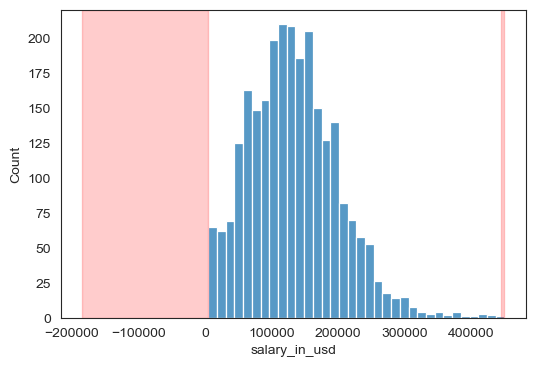

In [56]:
turkey_outliers(df, 'salary_in_usd')

#### 🔴Method 3: `LOF(Local Outlier Factor)`

In [57]:
col_num = ['salary_in_usd']
neighbors_range = range(5, 100, 10)
outlier_counts = {} 

for i in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=i)
    outliers = lof.fit_predict(df[col_num])
    num_outliers = (outliers == -1).sum()
    outlier_counts[i] = num_outliers

for n, count in outlier_counts.items():
    print(f"n_neighbors={n}: Number of outliers={count}")

n_neighbors=5: Number of outliers=449
n_neighbors=15: Number of outliers=445
n_neighbors=25: Number of outliers=409
n_neighbors=35: Number of outliers=336
n_neighbors=45: Number of outliers=199
n_neighbors=55: Number of outliers=153
n_neighbors=65: Number of outliers=67
n_neighbors=75: Number of outliers=34
n_neighbors=85: Number of outliers=47
n_neighbors=95: Number of outliers=56


In [58]:
col_num = ['salary_in_usd']
lof = LocalOutlierFactor(n_neighbors=75)
outliers = lof.fit_predict(df[col_num])
df["LOF"] = outliers

In [59]:
df[df['LOF']==-1].shape

(34, 12)

In [60]:
df.drop('LOF', axis=1, inplace=True)

### Since my dataset contains only one numerical variable, which is also the target variable, there is no need to handle outliers.

# -----------🔴Target Variable : `'salary_in_usd' (Classification)`------------

### Segment the `'salary_in_usd'` column into several bins to create target variables for classification predictions."

In [61]:
df.salary_in_usd.describe()

count      2584.000000
mean     133409.280186
std       67136.837329
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [62]:
df.salary_in_usd.quantile([0.3, 0.5, 0.6, 0.8, 1])

0.3     95000.0
0.5    130000.0
0.6    145000.0
0.8    187000.0
1.0    450000.0
Name: salary_in_usd, dtype: float64

In [14]:
bins = [0, 120000, 200000, 460000]
labels = ['Entry', 'Intermediate', 'High']
df['salary_bins'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels, right=False)
df.salary_bins.value_counts()

salary_bins
Entry           1122
Intermediate    1039
High             423
Name: count, dtype: int64

In [15]:
df

,work_year,experience_level,full_time,salary,salary_currency,salary_in_usd,employee_residence(US),remote,company_location(US),company_size,job_category,salary_bins
0,2023,SE,1,80000,EUR,85847,0,Home,0,L,Manager/Head/Lead,Entry
1,2023,MI,0,30000,USD,30000,1,Home,1,S,Data Engineer,Entry
2,2023,MI,0,25500,USD,25500,1,Home,1,S,Data Engineer,Entry
3,2023,SE,1,175000,USD,175000,0,Home,0,M,Data Scientist,Intermediate
4,2023,SE,1,120000,USD,120000,0,Home,0,M,Data Scientist,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,1,412000,USD,412000,1,Home,1,L,Data Scientist,High
3751,2021,MI,1,151000,USD,151000,1,Home,1,L,Manager/Head/Lead,Intermediate
3752,2020,EN,1,105000,USD,105000,1,Home,1,S,Data Scientist,Entry
3753,2020,EN,0,100000,USD,100000,1,Home,1,L,Data Analyst,Entry


# 8. Bivariate Analysis: Perform at least one analysis for each of the following hypothesis tests:
### 🔴 `Chi-square` test to assess independence between two categorical variables

#### *`chi_square function`*

In [65]:
def chi_square(df,c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))
    print(f'\n🟥{c1} vs {c2}')
    print("Actual values:\n")
    print(pd.crosstab(df[c1],df[c2],margins = True))
    print("-"*100)
    
    print("Expected values: \n")
    print(exp_val)
    print("-"*100)

    print(f'\nChi-square is : {chi_2}', f'\np_value is : {p_val}', f'\ndegree of freedom is :{dof}')
    print("-"*100)
    
    if exp_val.min()<5 or np.sum(exp_val)<30 : 
        print('Warning : We have some small expected values or the total number of observations is not enough to get any conclusion.')
    elif p_val < 0.05:
        print(f'There is statistically significant association between "{c1}" and "{c2}" at 0.05 significant level.')
    else:
        print(f"""There is no association between the two variables. We don't have enough evidence to conclude there is a statistically significant association between "{c1}" and "{c2}".""")   

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   work_year               2584 non-null   int64   
 1   experience_level        2584 non-null   object  
 2   full_time               2584 non-null   int64   
 3   salary                  2584 non-null   int64   
 4   salary_currency         2584 non-null   object  
 5   salary_in_usd           2584 non-null   int64   
 6   employee_residence(US)  2584 non-null   int64   
 7   remote                  2584 non-null   object  
 8   company_location(US)    2584 non-null   int64   
 9   company_size            2584 non-null   object  
 10  job_category            2584 non-null   object  
 11  salary_bins             2584 non-null   category
dtypes: category(1), int64(6), object(5)
memory usage: 244.9+ KB


In [67]:
col_cat = ['work_year','experience_level','full_time','employee_residence(US)','remote','company_location(US)','company_size','job_category']

In [68]:
for col in col_cat:
    chi_square(df, col, 'salary_bins')
    print("🔳"*50)


🟥work_year vs salary_bins
Actual values:

salary_bins  Entry  Intermediate  High   All
work_year                                   
2020            59            11     5    75
2021           166            43    19   228
2022           494           474   157  1125
2023           403           511   242  1156
All           1122          1039   423  2584
----------------------------------------------------------------------------------------------------
Expected values: 

[[ 32.56578947  30.15673375  12.27747678]
 [ 99.          91.67647059  37.32352941]
 [488.48684211 452.35100619 184.1621517 ]
 [501.94736842 464.81578947 189.23684211]]
----------------------------------------------------------------------------------------------------

Chi-square is : 162.03431086243742 
p_value is : 2.1955352966110733e-32 
degree of freedom is :6
----------------------------------------------------------------------------------------------------
There is statistically significant association betwee

### The Chi-Square test indicates that all the categorical variables are significantly associated with `salary_bins` at the 5% significance level.

## Visualizations

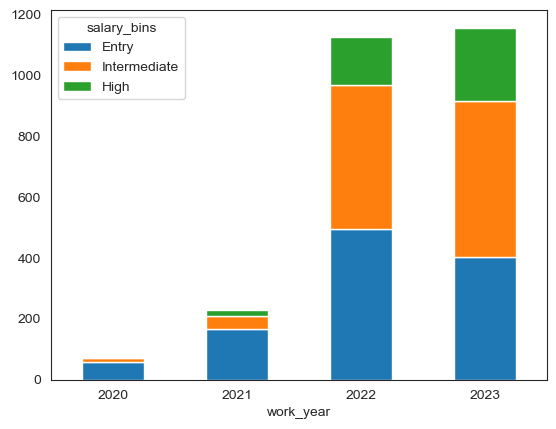

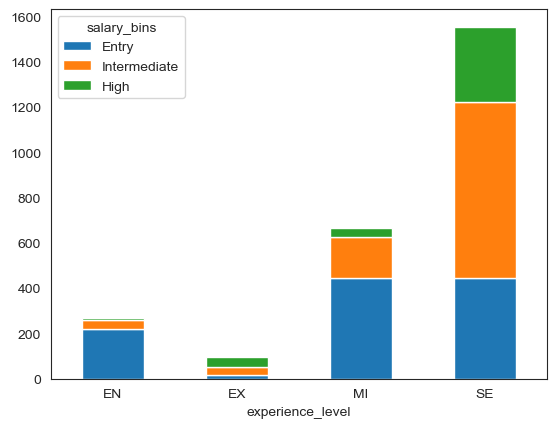

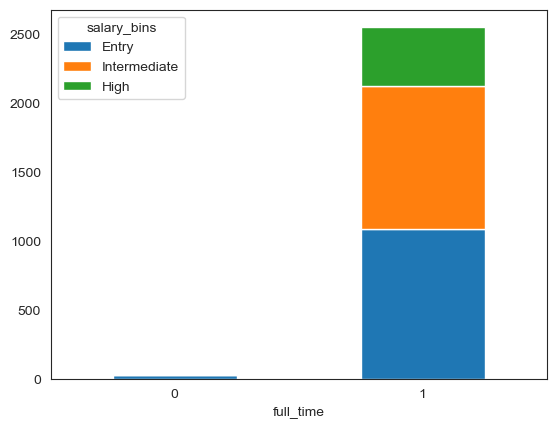

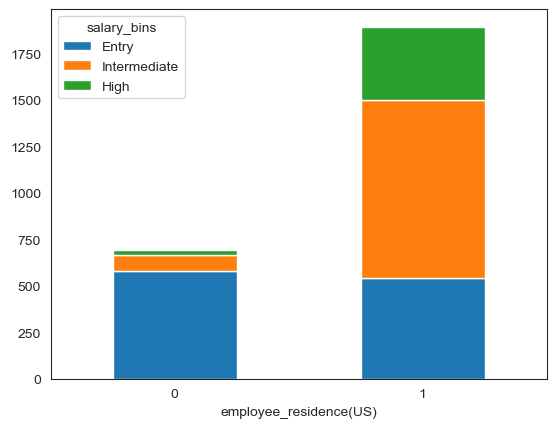

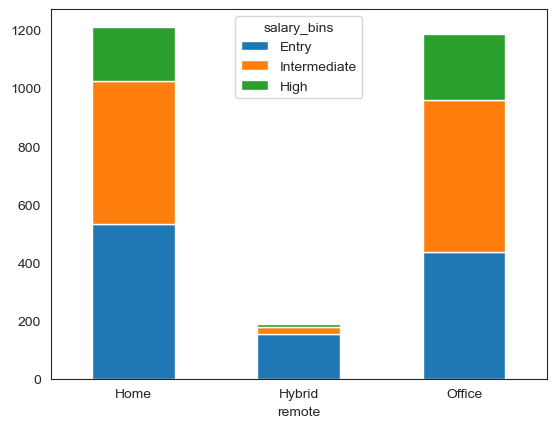

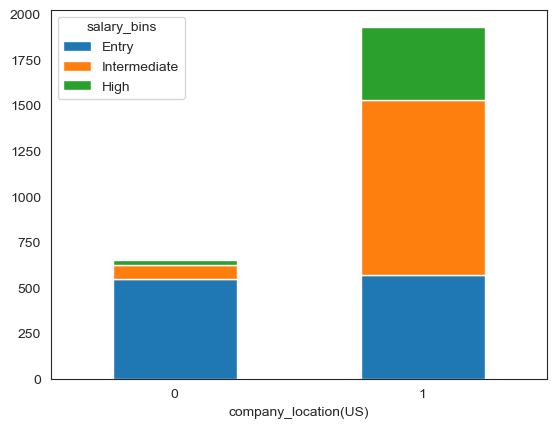

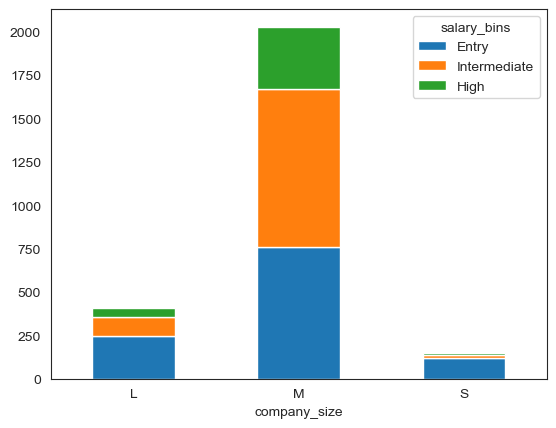

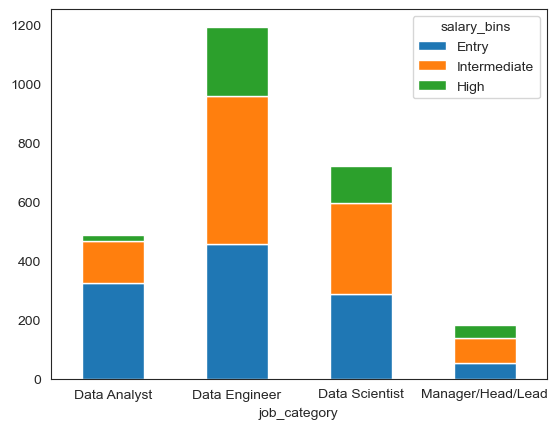

In [69]:
for col in df[col_cat]: 
    pd.crosstab(df[col], df['salary_bins']).plot(kind='bar',stacked=True)
    plt.xticks(rotation=0)
    sns.set_style("white")  
    plt.show()

In [70]:
salary_cat = df.groupby('job_category').agg({'salary_in_usd':'mean'})
salary_cat

,salary_in_usd
job_category,
Data Analyst,100863.622951
Data Engineer,141795.283319
Data Scientist,135700.689320
Manager/Head/Lead,156627.263736


In [71]:
salary_cat.reset_index()

,job_category,salary_in_usd
0,Data Analyst,100863.622951
1,Data Engineer,141795.283319
2,Data Scientist,135700.689320
3,Manager/Head/Lead,156627.263736


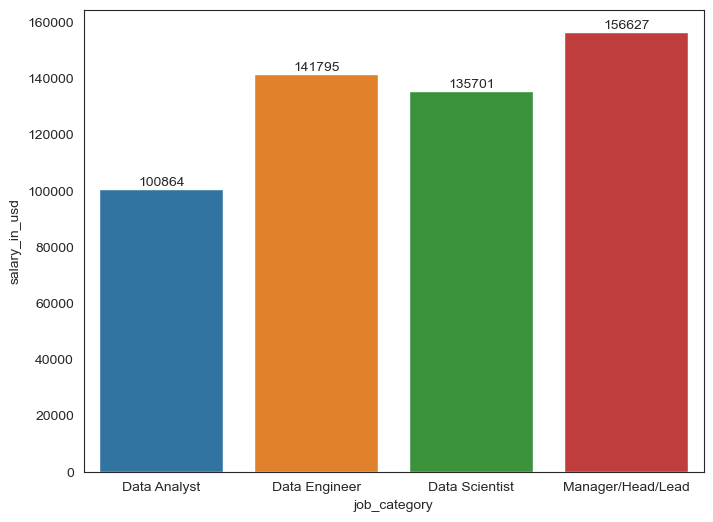

In [72]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data=salary_cat, x='job_category', y='salary_in_usd', hue='job_category')
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
plt.show()

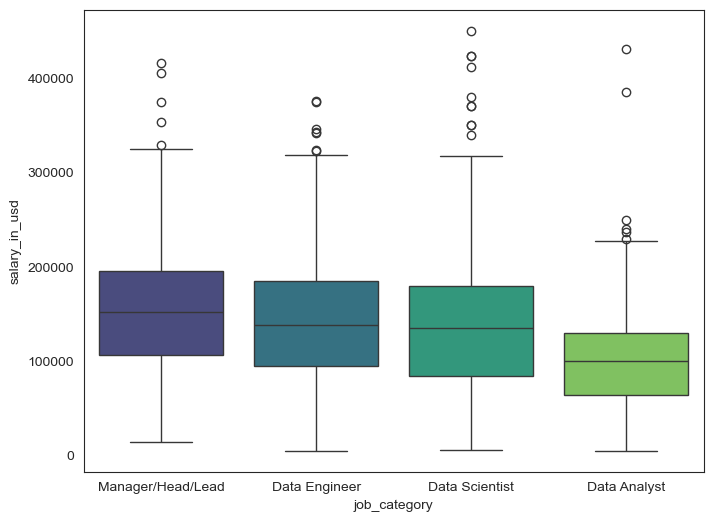

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='job_category', y='salary_in_usd', hue='job_category', data=df, palette="viridis")
plt.show()

In [74]:
salary_exper = df.groupby('experience_level').agg({'salary_in_usd':'mean'})
salary_exper

,salary_in_usd
experience_level,
EN,72648.685185
EX,191078.208333
MI,101828.783133
SE,153897.435650


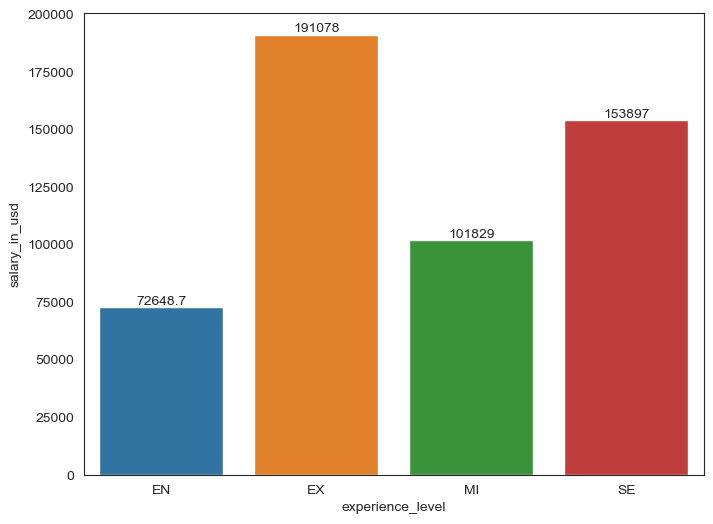

In [75]:
salary_exper.reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=salary_exper, x='experience_level', y='salary_in_usd', hue='experience_level')
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
plt.show()

In [76]:
salary_loc = df.groupby('company_location(US)').agg({'salary_in_usd':'mean'})
salary_loc

,salary_in_usd
company_location(US),
0,77555.125191
1,152374.791602


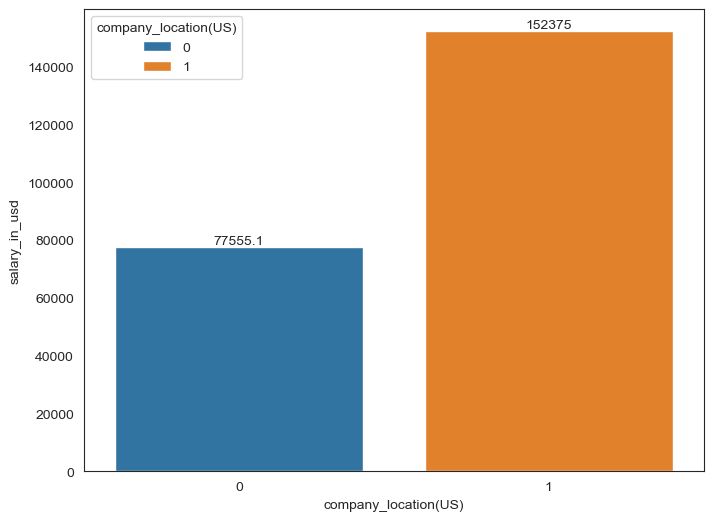

In [77]:
salary_loc.reset_index()
plt.figure(figsize=(8,6))
ax = sns.barplot(data=salary_loc, x='company_location(US)', y='salary_in_usd', hue='company_location(US)')
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)
plt.show()

#### __`🟣Cramer's V`__ between Categorical Variables

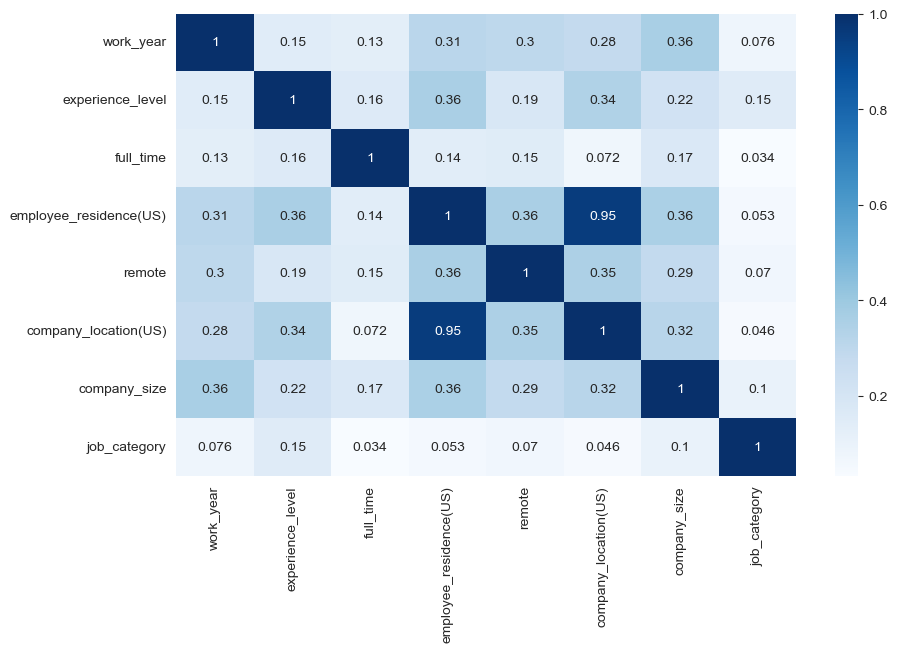

In [78]:
def cramers_v(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab,correction=False)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return np.sqrt(stat/(obs*mini))

rows = []
for var1 in df[col_cat]:
    cols = []
    for var2 in df[col_cat]:
        cramers = cramers_v(df[var1],df[var2])
        cols.append(round(cramers,4))
    rows.append(cols)

cramers_results = np.array(rows)
cramers_matrix = pd.DataFrame(cramers_results, columns=col_cat, index=col_cat)
cramers_matrix

plt.figure(figsize=(10,6))
sns.heatmap(cramers_matrix, cmap="Blues", annot=True)
plt.show()

### The `employee_residence(US)` and `company_location(US)` variables have a very high Cramer's V score of 0.95, indicating a strong relationship between these two categorical variables. We will drop one of them.

In [16]:
df = df.drop('employee_residence(US)', axis=1)

In [17]:
df

,work_year,experience_level,full_time,salary,salary_currency,salary_in_usd,remote,company_location(US),company_size,job_category,salary_bins
0,2023,SE,1,80000,EUR,85847,Home,0,L,Manager/Head/Lead,Entry
1,2023,MI,0,30000,USD,30000,Home,1,S,Data Engineer,Entry
2,2023,MI,0,25500,USD,25500,Home,1,S,Data Engineer,Entry
3,2023,SE,1,175000,USD,175000,Home,0,M,Data Scientist,Intermediate
4,2023,SE,1,120000,USD,120000,Home,0,M,Data Scientist,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,1,412000,USD,412000,Home,1,L,Data Scientist,High
3751,2021,MI,1,151000,USD,151000,Home,1,L,Manager/Head/Lead,Intermediate
3752,2020,EN,1,105000,USD,105000,Home,1,S,Data Scientist,Entry
3753,2020,EN,0,100000,USD,100000,Home,1,L,Data Analyst,Entry


### 🔴 __`Correlation`__ analysis to examine relationships between two numeric variables.

### `work_year` vs `salary_in_usd`

In [81]:
df['work_year'].corr(df['salary_in_usd'])

0.23695790252532337

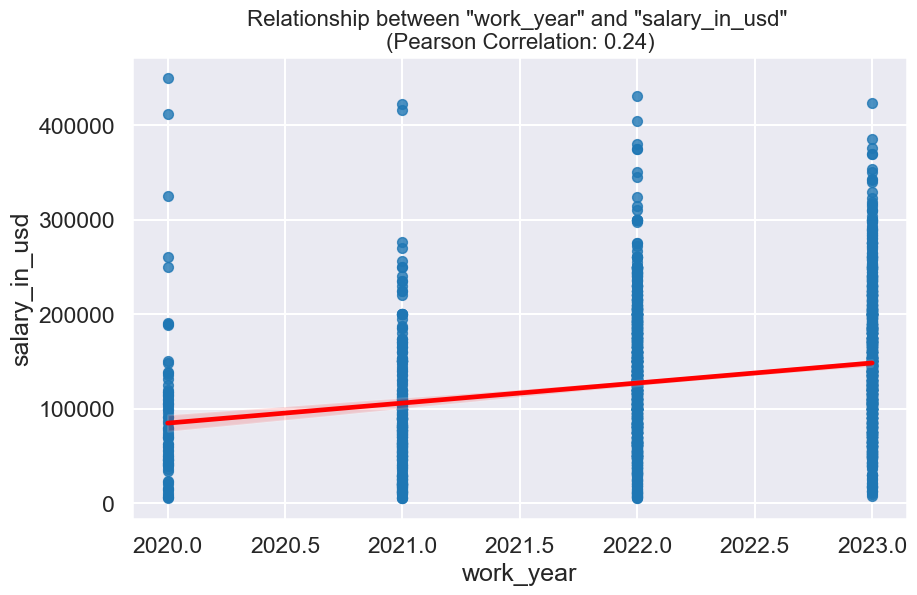

In [82]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.set_context('talk')

col_num=['work_year','salary_in_usd']
corr_matrix = df[col_num].corr()
pearson_corr = corr_matrix.loc['work_year', 'salary_in_usd']
sns.regplot(data=df, x='work_year', y='salary_in_usd', scatter_kws={'s':50}, line_kws={'color':'red'})

plt.title(f'Relationship between "work_year" and "salary_in_usd" \n(Pearson Correlation: {pearson_corr:.2f})', fontsize=16)
plt.show()

### The Pearson correlation between `work_year` and `salary_in_usd` is around 0.24, indicating a weak correlation between these two variables.

# 9. Check for presence of collinearity and multi-collinearity and address it appropriately.

### Since there are no continuous predictor variables in the dataset, assessing collinearity or multi-collinearity is not applicable.

### The inclusion of `salary_in_usd` in the dataset makes the `salary and salary_currency` columns redundant; hence, these two columns will be removed. Furthermore, since 'salary_in_usd' has already been segmented into three levels, it will also be removed from the dataset.

In [83]:
df

,work_year,experience_level,full_time,salary,salary_currency,salary_in_usd,remote,company_location(US),company_size,job_category,salary_bins
0,2023,SE,1,80000,EUR,85847,Home,0,L,Manager/Head/Lead,Entry
1,2023,MI,0,30000,USD,30000,Home,1,S,Data Engineer,Entry
2,2023,MI,0,25500,USD,25500,Home,1,S,Data Engineer,Entry
3,2023,SE,1,175000,USD,175000,Home,0,M,Data Scientist,Intermediate
4,2023,SE,1,120000,USD,120000,Home,0,M,Data Scientist,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,1,412000,USD,412000,Home,1,L,Data Scientist,High
3751,2021,MI,1,151000,USD,151000,Home,1,L,Manager/Head/Lead,Intermediate
3752,2020,EN,1,105000,USD,105000,Home,1,S,Data Scientist,Entry
3753,2020,EN,0,100000,USD,100000,Home,1,L,Data Analyst,Entry


In [18]:
df = df.drop(['salary','salary_currency','salary_in_usd'], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   work_year             2584 non-null   int64   
 1   experience_level      2584 non-null   object  
 2   full_time             2584 non-null   int64   
 3   remote                2584 non-null   object  
 4   company_location(US)  2584 non-null   int64   
 5   company_size          2584 non-null   object  
 6   job_category          2584 non-null   object  
 7   salary_bins           2584 non-null   category
dtypes: category(1), int64(3), object(4)
memory usage: 164.2+ KB


In [20]:
df

,work_year,experience_level,full_time,remote,company_location(US),company_size,job_category,salary_bins
0,2023,SE,1,Home,0,L,Manager/Head/Lead,Entry
1,2023,MI,0,Home,1,S,Data Engineer,Entry
2,2023,MI,0,Home,1,S,Data Engineer,Entry
3,2023,SE,1,Home,0,M,Data Scientist,Intermediate
4,2023,SE,1,Home,0,M,Data Scientist,Intermediate
...,...,...,...,...,...,...,...,...
3750,2020,SE,1,Home,1,L,Data Scientist,High
3751,2021,MI,1,Home,1,L,Manager/Head/Lead,Intermediate
3752,2020,EN,1,Home,1,S,Data Scientist,Entry
3753,2020,EN,0,Home,1,L,Data Analyst,Entry


# 10. Encode the data if required (if there are categorical independent variables).

In [21]:
X = df.drop('salary_bins', axis=1)
y = df['salary_bins']

In [88]:
value_counts(X)

work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64
full_time
1    2547
0      37
Name: count, dtype: int64
remote
Home      1211
Office    1186
Hybrid     187
Name: count, dtype: int64
company_location(US)
1    1929
0     655
Name: count, dtype: int64
company_size
M    2028
L     409
S     147
Name: count, dtype: int64
job_category
Data Engineer        1193
Data Scientist        721
Data Analyst          488
Manager/Head/Lead     182
Name: count, dtype: int64


In [22]:
X = pd.get_dummies(X, columns=['work_year','experience_level','remote','company_size','job_category'], drop_first=True)
X

,full_time,company_location(US),work_year_2021,work_year_2022,work_year_2023,experience_level_EX,experience_level_MI,experience_level_SE,remote_Hybrid,remote_Office,company_size_M,company_size_S,job_category_Data Engineer,job_category_Data Scientist,job_category_Manager/Head/Lead
0,1,0,False,False,True,False,False,True,False,False,False,False,False,False,True
1,0,1,False,False,True,False,True,False,False,False,False,True,True,False,False
2,0,1,False,False,True,False,True,False,False,False,False,True,True,False,False
3,1,0,False,False,True,False,False,True,False,False,True,False,False,True,False
4,1,0,False,False,True,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,1,1,False,False,False,False,False,True,False,False,False,False,False,True,False
3751,1,1,True,False,False,False,True,False,False,False,False,False,False,False,True
3752,1,1,False,False,False,False,False,False,False,False,False,True,False,True,False
3753,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False


# 11. Split the dataset into training and testing subsets.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, shuffle=True, random_state=seed, test_size=0.2)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2067, 15), (2067,), (517, 15), (517,))

# 12. Scale the training data and use the same scaler to also scale the test data. (use scaled data for algorithms requiring scaling)

In [92]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [93]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index)
X_train_sc

,full_time,company_location(US),work_year_2021,work_year_2022,work_year_2023,experience_level_EX,experience_level_MI,experience_level_SE,remote_Hybrid,remote_Office,company_size_M,company_size_S,job_category_Data Engineer,job_category_Data Scientist,job_category_Manager/Head/Lead
3453,0.121357,-1.675300,-0.306024,1.139834,-0.908830,-0.196707,1.681600,-1.222033,-0.273648,-0.914167,-1.898305,-0.254784,-0.922221,1.591645,-0.273648
3183,0.121357,-1.675300,-0.306024,1.139834,-0.908830,5.083715,-0.594672,-1.222033,-0.273648,-0.914167,-1.898305,3.924890,-0.922221,-0.628281,3.654335
1845,0.121357,0.596908,-0.306024,1.139834,-0.908830,-0.196707,-0.594672,0.818308,-0.273648,-0.914167,0.526786,-0.254784,-0.922221,1.591645,-0.273648
2835,0.121357,0.596908,-0.306024,1.139834,-0.908830,-0.196707,-0.594672,0.818308,-0.273648,-0.914167,0.526786,-0.254784,1.084338,-0.628281,-0.273648
2817,0.121357,0.596908,-0.306024,1.139834,-0.908830,-0.196707,-0.594672,0.818308,-0.273648,-0.914167,-1.898305,-0.254784,-0.922221,1.591645,-0.273648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,0.121357,0.596908,-0.306024,-0.877321,1.100316,-0.196707,-0.594672,-1.222033,-0.273648,1.093892,0.526786,-0.254784,1.084338,-0.628281,-0.273648
10,0.121357,0.596908,-0.306024,-0.877321,1.100316,-0.196707,-0.594672,0.818308,-0.273648,1.093892,0.526786,-0.254784,-0.922221,1.591645,-0.273648
595,0.121357,0.596908,-0.306024,-0.877321,1.100316,-0.196707,1.681600,-1.222033,-0.273648,-0.914167,0.526786,-0.254784,1.084338,-0.628281,-0.273648
3131,0.121357,0.596908,-0.306024,1.139834,-0.908830,-0.196707,-0.594672,0.818308,-0.273648,-0.914167,0.526786,-0.254784,-0.922221,-0.628281,-0.273648


In [94]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns, index=X_test.index)
X_test_sc

,full_time,company_location(US),work_year_2021,work_year_2022,work_year_2023,experience_level_EX,experience_level_MI,experience_level_SE,remote_Hybrid,remote_Office,company_size_M,company_size_S,job_category_Data Engineer,job_category_Data Scientist,job_category_Manager/Head/Lead
1114,0.121357,0.596908,-0.306024,-0.877321,1.100316,-0.196707,-0.594672,0.818308,-0.273648,-0.914167,0.526786,-0.254784,1.084338,-0.628281,-0.273648
2089,0.121357,0.596908,-0.306024,1.139834,-0.908830,-0.196707,-0.594672,0.818308,-0.273648,-0.914167,0.526786,-0.254784,-0.922221,-0.628281,-0.273648
3339,0.121357,-1.675300,-0.306024,1.139834,-0.908830,-0.196707,1.681600,-1.222033,-0.273648,1.093892,0.526786,-0.254784,-0.922221,-0.628281,-0.273648
3505,0.121357,-1.675300,3.267716,-0.877321,-0.908830,-0.196707,-0.594672,0.818308,3.654335,-0.914167,0.526786,-0.254784,1.084338,-0.628281,-0.273648
2710,0.121357,0.596908,-0.306024,1.139834,-0.908830,5.083715,-0.594672,-1.222033,-0.273648,-0.914167,0.526786,-0.254784,1.084338,-0.628281,-0.273648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0.121357,-1.675300,-0.306024,-0.877321,1.100316,-0.196707,-0.594672,0.818308,-0.273648,-0.914167,0.526786,-0.254784,1.084338,-0.628281,-0.273648
245,0.121357,0.596908,-0.306024,-0.877321,1.100316,-0.196707,-0.594672,0.818308,-0.273648,1.093892,0.526786,-0.254784,-0.922221,-0.628281,3.654335
210,0.121357,0.596908,-0.306024,-0.877321,1.100316,-0.196707,-0.594672,0.818308,-0.273648,1.093892,0.526786,-0.254784,1.084338,-0.628281,-0.273648
2252,0.121357,0.596908,-0.306024,1.139834,-0.908830,-0.196707,-0.594672,0.818308,-0.273648,1.093892,0.526786,-0.254784,-0.922221,1.591645,-0.273648


# 13. Perform PCA. Based on outcome, recommend if Principal Components would be useful for data preparation or not. 

### Since there are no continuous predictor variables in the dataset, performing PCA is not applicable.

# 14. Depending on prediction goal, refer to appropriate section below:
# 15. Check for overfitting and take steps to address it
## 🚩__Classification__: Build models based on at least 3 different algorithms
#### 1. `Logistic Regression` / DecisionTreeClassifier / LDA: Choose any one of these 3
#### 2. `KNN`, `SVM`, `RandomForest`, AdaBoost, `XGBoost`: For models other than KNN, tune atleast 3 hyperparameters using GridSearchCV.

In [26]:
def classifier_metrics(model, classifier, X_train_sc, y_train, X_test_sc, y_test):
    y_train_pred = classifier.predict(X_train_sc)
    y_test_pred = classifier.predict(X_test_sc)
    
    #training set
    print('MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧')
    train_score = cross_val_score(classifier, X_train_sc, y_train, cv=5).mean()
    print('Cross-Val Score:', train_score)

    train_confmatrix = confusion_matrix(y_train, y_train_pred)
    print('Confusion Matrix\n', train_confmatrix)
    fig, ax = plt.subplots(figsize=(6,5))
    train_confmatrix_plot = ConfusionMatrixDisplay(confusion_matrix=train_confmatrix, display_labels=classifier.classes_)
    train_confmatrix_plot.plot(cmap='Blues',ax=ax)
    for text in train_confmatrix_plot.text_.ravel():
        text.set_fontsize(14)
    ax.set_xlabel('Predicted Labels', fontsize=14)
    ax.set_ylabel('True Labels', fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    
    print('Classification Report:\n', classification_report(y_train,y_train_pred))


    #test set
    print('MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧')
    test_score = accuracy_score(y_test, y_test_pred)
    print('Accuracy Score:', test_score)

    test_confmatrix = confusion_matrix(y_test, y_test_pred)
    print('Confusion Matrix\n', test_confmatrix)
    fig, ax = plt.subplots(figsize=(6,5))
    test_confmatrix_plot = ConfusionMatrixDisplay(confusion_matrix=test_confmatrix, display_labels=classifier.classes_)
    test_confmatrix_plot.plot(cmap='Blues',ax=ax)
    for text in test_confmatrix_plot.text_.ravel():
        text.set_fontsize(14)
    ax.set_xlabel('Predicted Labels', fontsize=14)
    ax.set_ylabel('True Labels', fontsize=14)
    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    
    print('Classification Report:\n', classification_report(y_test, y_test_pred))

    # roc_auc_curve
    # Binarize the y_test for multiclass ROC curve calculation
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_test_proba = classifier.predict_proba(X_test_sc)
    
    roc_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
    # Compute the ROC curve for the micro-average
    fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_test_proba.ravel())
    
    plt.figure(figsize=(5,5))
    plt.plot(fpr_micro, tpr_micro, color='darkorange', linewidth=2)
    plt.title(f'Micro-Average ROC Curve (AUC = {round(roc_auc, 4)})', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.set_style("white")
    plt.show()

    
    #results
    df_results = pd.DataFrame({  
                                  'Model':[model],
                                  'Train Cross-Val Score': [train_score],
                                  'Test Accuracy Score': [test_score],
                                  'Train Roc_Auc': [roc_auc_score(y_train, classifier.predict_proba(X_train_sc),multi_class='ovr')],
                                  'Test Roc_Auc': [roc_auc_score(y_test, classifier.predict_proba(X_test_sc), multi_class='ovr')],
                                  'Train f1 Score': [f1_score(y_train, y_train_pred, average='weighted')],
                                  'Test f1 Score': [f1_score(y_test, y_test_pred, average='weighted')],
                                  # 'Train Recall Score': [recall_score(y_train, y_train_pred, average='weighted')],
                                  # 'Test Recall Score': [recall_score(y_test, y_test_pred, average='weighted')]                             
             }).set_index('Model')

 
    return df_results

### 🔴 __`Logistic Regression`__

### ➡️ Default Parameter Configuration

In [190]:
lg = LogisticRegression(multi_class='ovr',random_state=seed,n_jobs=-1)
lg.fit(X_train_sc, y_train)

LogisticRegression(multi_class='ovr', n_jobs=-1, random_state=3)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6202208419599724
Confusion Matrix
 [[645   4 249]
 [ 39  23 276]
 [171  14 646]]


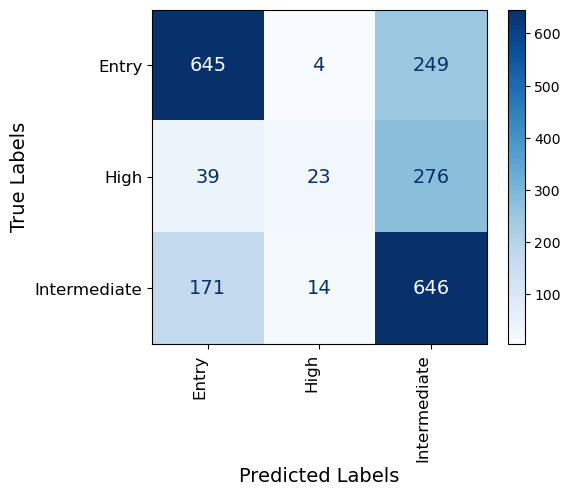

Classification Report:
               precision    recall  f1-score   support

       Entry       0.75      0.72      0.74       898
        High       0.56      0.07      0.12       338
Intermediate       0.55      0.78      0.65       831

    accuracy                           0.64      2067
   macro avg       0.62      0.52      0.50      2067
weighted avg       0.64      0.64      0.60      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6344294003868471
Confusion Matrix
 [[156   2  66]
 [ 10   5  70]
 [ 39   2 167]]


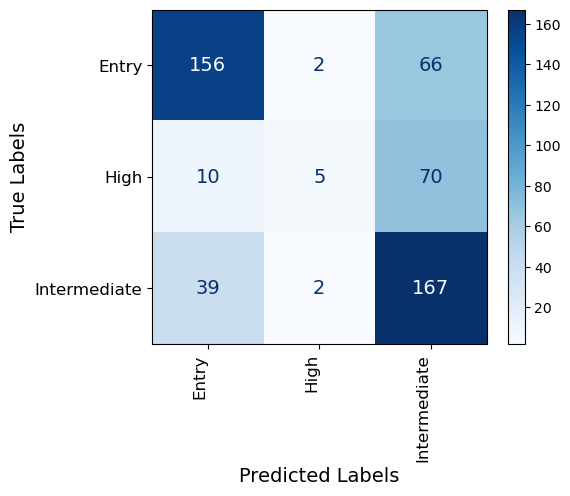

Classification Report:
               precision    recall  f1-score   support

       Entry       0.76      0.70      0.73       224
        High       0.56      0.06      0.11        85
Intermediate       0.55      0.80      0.65       208

    accuracy                           0.63       517
   macro avg       0.62      0.52      0.50       517
weighted avg       0.64      0.63      0.60       517



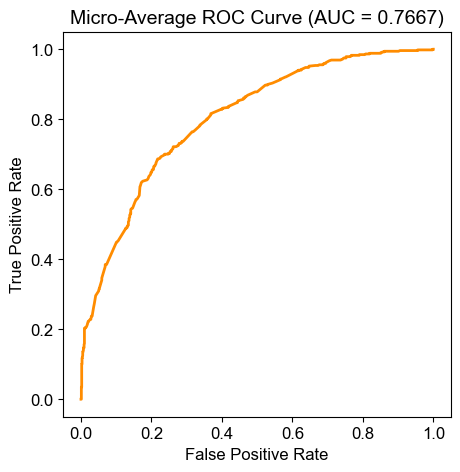

In [191]:
lg_def_results = classifier_metrics('LogisticRegression_default', lg, X_train_sc, y_train, X_test_sc, y_test)

In [98]:
lg_coef = pd.DataFrame(lg.coef_, columns=X_test_sc.columns, index=['Entry','High','Intermediate']).T
lg_coef

,Entry,High,Intermediate
full_time,-0.217071,-0.033341,0.561686
company_location(US),-1.003043,0.576523,0.755436
work_year_2021,-0.116093,0.093713,0.079333
work_year_2022,-0.339892,0.173271,0.251530
work_year_2023,-0.452929,0.328768,0.247460
experience_level_EX,-0.502164,0.502594,0.075879
experience_level_MI,-0.210238,0.111656,0.171040
experience_level_SE,-0.809043,0.773417,0.420285
remote_Hybrid,0.069656,-0.121587,-0.014484
remote_Office,-0.017958,0.053534,-0.028300


In [99]:
lg_coef.reindex(columns=['Entry','Intermediate','High'])

,Entry,Intermediate,High
full_time,-0.217071,0.561686,-0.033341
company_location(US),-1.003043,0.755436,0.576523
work_year_2021,-0.116093,0.079333,0.093713
work_year_2022,-0.339892,0.251530,0.173271
work_year_2023,-0.452929,0.247460,0.328768
experience_level_EX,-0.502164,0.075879,0.502594
experience_level_MI,-0.210238,0.171040,0.111656
experience_level_SE,-0.809043,0.420285,0.773417
remote_Hybrid,0.069656,-0.014484,-0.121587
remote_Office,-0.017958,-0.028300,0.053534


In [100]:
lg_def_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.59556


### ➡️ Hyperparameter Tuning for Model Optimization

In [101]:
start = time.time()

params = [
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l2'],
        'class_weight': [None, 'balanced'],
        'solver': ['lbfgs'],
        # "multi_class":['auto', 'ovr']
    },
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l1', 'l2'],
        'class_weight': [None, 'balanced'],
        'solver': ['liblinear'],
        # "multi_class":['auto', 'ovr']
    },
    {
        'C': [0.1, 0.3, 0.5, 0.75, 1, 2, 5],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'l1_ratio': np.linspace(0, 1, 5),
        'class_weight': [None, 'balanced'],
        'solver': ['saga'],
        # "multi_class":['auto', 'ovr']
    }
]

lg = LogisticRegression(multi_class='ovr', random_state=seed, n_jobs=-1)
lg_grid = GridSearchCV(lg, params, cv=5, n_jobs=-1)
lg_grid.fit(X_train_sc, y_train)

end = time.time()
no_of_combinations = 0
for i in params:
    grid_combinations = 1
    for key, value in i.items():
        grid_combinations *= len(value) 
    no_of_combinations += grid_combinations


print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', lg_grid.best_params_)
print('Best Cross-Validation Score:', lg_grid.best_score_)

Time taken by Grid Search over 252 combinations of hyperparameters 20.15065598487854
Best Parameters: {'C': 2, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.6216736264636042


In [192]:
lg_best = lg_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6216736264636042
Confusion Matrix
 [[645   4 249]
 [ 38  24 276]
 [171  14 646]]


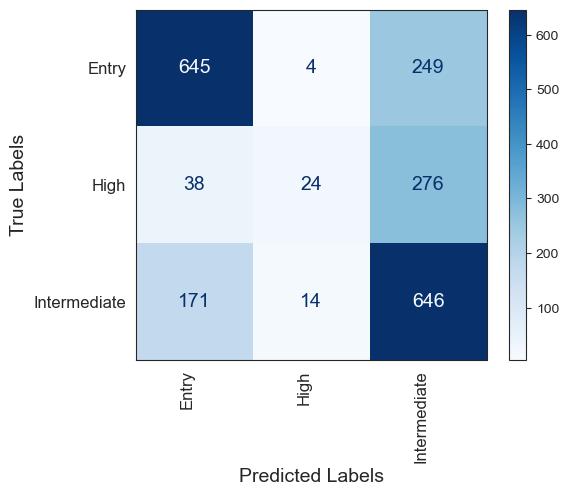

Classification Report:
               precision    recall  f1-score   support

       Entry       0.76      0.72      0.74       898
        High       0.57      0.07      0.13       338
Intermediate       0.55      0.78      0.65       831

    accuracy                           0.64      2067
   macro avg       0.63      0.52      0.50      2067
weighted avg       0.64      0.64      0.60      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6344294003868471
Confusion Matrix
 [[156   2  66]
 [ 10   5  70]
 [ 39   2 167]]


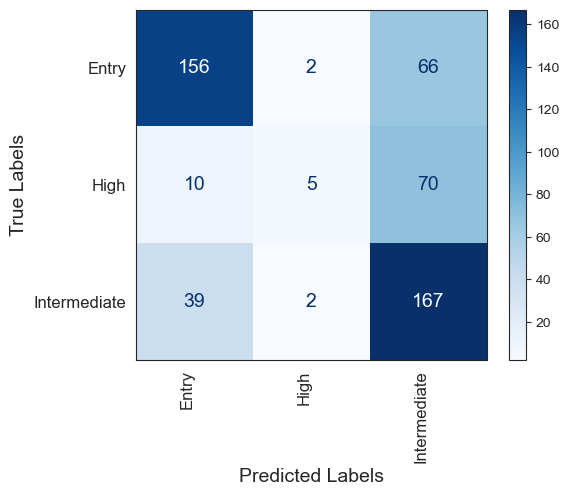

Classification Report:
               precision    recall  f1-score   support

       Entry       0.76      0.70      0.73       224
        High       0.56      0.06      0.11        85
Intermediate       0.55      0.80      0.65       208

    accuracy                           0.63       517
   macro avg       0.62      0.52      0.50       517
weighted avg       0.64      0.63      0.60       517



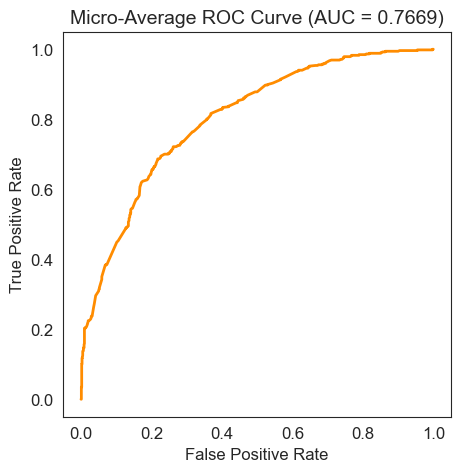

In [193]:
lg_tuned_results = classifier_metrics('LogisticRegression_tuned', lg_best, X_train_sc, y_train, X_test_sc, y_test)

In [194]:
lg_best_coef = pd.DataFrame(lg_best.coef_, columns=X_test_sc.columns, index=['Entry','High','Intermediate']).T
lg_best_coef

,Entry,High,Intermediate
full_time,-0.218022,-0.034830,0.630163
company_location(US),-1.005962,0.579095,0.757201
work_year_2021,-0.125651,0.106939,0.085491
work_year_2022,-0.357847,0.197784,0.262518
work_year_2023,-0.471516,0.354109,0.258703
experience_level_EX,-0.505772,0.509895,0.076888
experience_level_MI,-0.216037,0.128381,0.174081
experience_level_SE,-0.815308,0.791415,0.423141
remote_Hybrid,0.069282,-0.121090,-0.013896
remote_Office,-0.017601,0.053186,-0.028556


In [195]:
lg_best_coef.reindex(columns=['Entry','Intermediate','High'])

,Entry,Intermediate,High
full_time,-0.218022,0.630163,-0.034830
company_location(US),-1.005962,0.757201,0.579095
work_year_2021,-0.125651,0.085491,0.106939
work_year_2022,-0.357847,0.262518,0.197784
work_year_2023,-0.471516,0.258703,0.354109
experience_level_EX,-0.505772,0.076888,0.509895
experience_level_MI,-0.216037,0.174081,0.128381
experience_level_SE,-0.815308,0.423141,0.791415
remote_Hybrid,0.069282,-0.013896,-0.121090
remote_Office,-0.017601,-0.028556,0.053186


In [196]:
df_results = pd.concat([lg_def_results, lg_tuned_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.59556
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.59556


# SMOTE - Imbalanced Dataset

In [27]:
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

df_smote = pd.concat([X_train_sm, y_train_sm], axis=1)
df_smote

,full_time,company_location(US),work_year_2021,work_year_2022,work_year_2023,experience_level_EX,experience_level_MI,experience_level_SE,remote_Hybrid,remote_Office,company_size_M,company_size_S,job_category_Data Engineer,job_category_Data Scientist,job_category_Manager/Head/Lead,salary_bins
0,1,0,False,True,False,False,True,False,False,False,False,False,False,True,False,Entry
1,1,0,False,True,False,True,False,False,False,False,False,True,False,False,True,Entry
2,1,1,False,True,False,False,False,True,False,False,True,False,False,True,False,Intermediate
3,1,1,False,True,False,False,False,True,False,False,True,False,True,False,False,Intermediate
4,1,1,False,True,False,False,False,True,False,False,False,False,False,True,False,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,1,1,False,False,True,False,False,True,False,False,True,False,True,False,False,Intermediate
2690,1,1,False,True,False,False,False,True,False,False,False,False,False,False,True,Intermediate
2691,1,1,False,True,False,False,False,True,False,False,True,False,True,False,False,Intermediate
2692,1,1,False,False,True,False,False,True,False,True,True,False,False,True,False,Intermediate


In [28]:
df_smote['salary_bins'].value_counts()

salary_bins
Entry           898
Intermediate    898
High            898
Name: count, dtype: int64

In [29]:
sc_smote = StandardScaler()

X_train_smsc = sc_smote.fit_transform(X_train_sm)
X_test_smsc = sc_smote.transform(X_test)

In [30]:
lg_smot = LogisticRegression(random_state=seed,n_jobs=-1)
lg_smot.fit(X_train_smsc, y_train_sm)

LogisticRegression(n_jobs=-1, random_state=3)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.5538267892489879
Confusion Matrix
 [[590 101 207]
 [ 99 498 301]
 [136 331 431]]


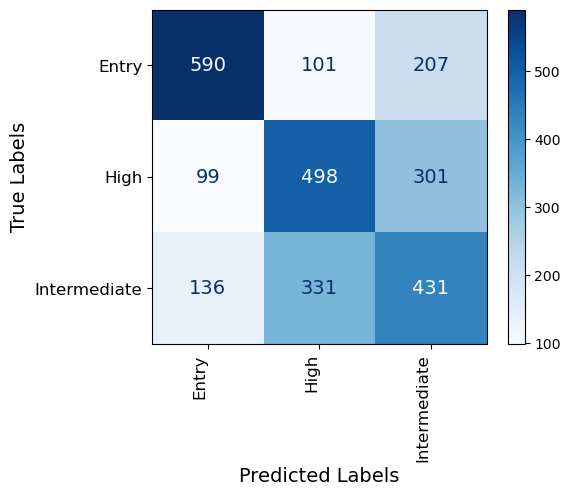

Classification Report:
               precision    recall  f1-score   support

       Entry       0.72      0.66      0.68       898
        High       0.54      0.55      0.54       898
Intermediate       0.46      0.48      0.47       898

    accuracy                           0.56      2694
   macro avg       0.57      0.56      0.57      2694
weighted avg       0.57      0.56      0.57      2694

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.5473887814313346
Confusion Matrix
 [[131  26  67]
 [  9  49  27]
 [ 31  74 103]]


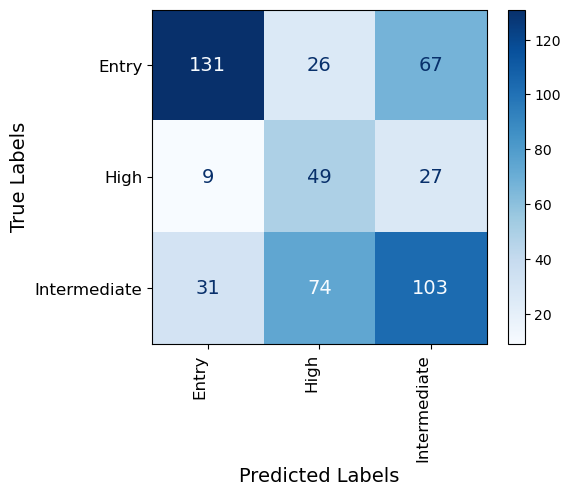

Classification Report:
               precision    recall  f1-score   support

       Entry       0.77      0.58      0.66       224
        High       0.33      0.58      0.42        85
Intermediate       0.52      0.50      0.51       208

    accuracy                           0.55       517
   macro avg       0.54      0.55      0.53       517
weighted avg       0.60      0.55      0.56       517



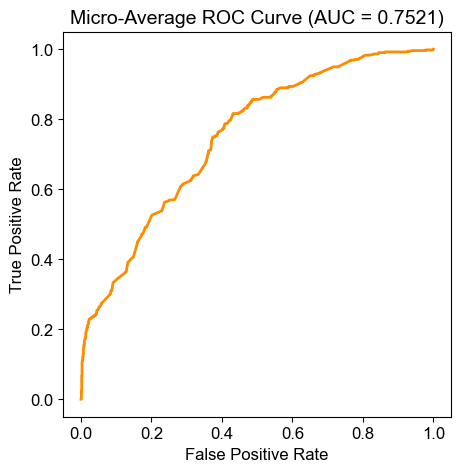

In [32]:
df_lg_smot = classifier_metrics('LogisticRegression_SMOT', lg_smot, X_train_smsc, y_train_sm, X_test_smsc, y_test)

In [33]:
df_lg_smot

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_SMOT,0.553827,0.547389,0.753664,0.752051,0.566318,0.560876


### 🔴 __`LDA (Linear Discriminant Analysis)`__

### ➡️ Default Parameter Configuration

In [197]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sc, y_train)

LinearDiscriminantAnalysis()

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6308652372764384
Confusion Matrix
 [[586   8 304]
 [ 30  34 274]
 [108  30 693]]


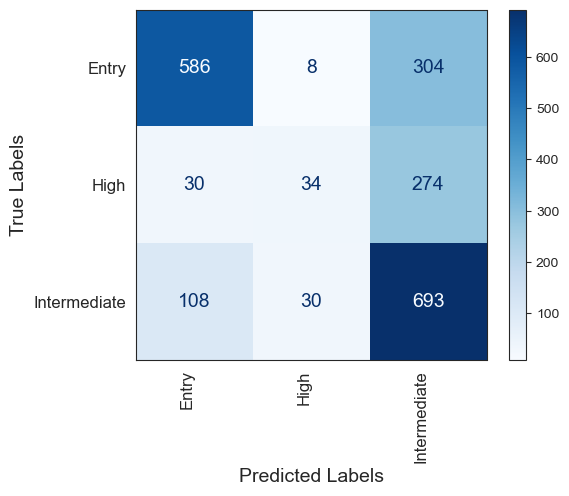

Classification Report:
               precision    recall  f1-score   support

       Entry       0.81      0.65      0.72       898
        High       0.47      0.10      0.17       338
Intermediate       0.55      0.83      0.66       831

    accuracy                           0.64      2067
   macro avg       0.61      0.53      0.52      2067
weighted avg       0.65      0.64      0.61      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6054158607350096
Confusion Matrix
 [[131   3  90]
 [  7   9  69]
 [ 30   5 173]]


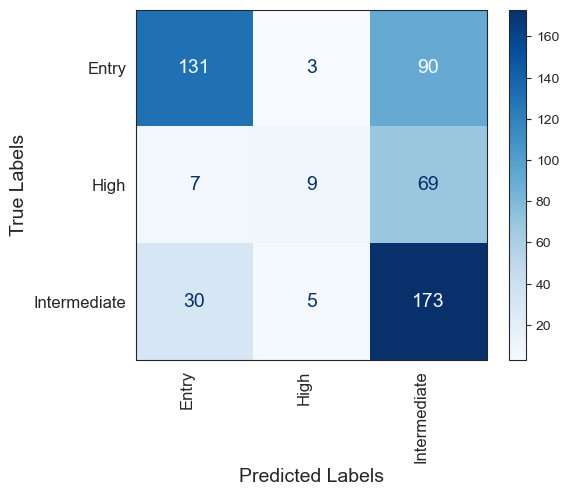

Classification Report:
               precision    recall  f1-score   support

       Entry       0.78      0.58      0.67       224
        High       0.53      0.11      0.18        85
Intermediate       0.52      0.83      0.64       208

    accuracy                           0.61       517
   macro avg       0.61      0.51      0.50       517
weighted avg       0.63      0.61      0.58       517



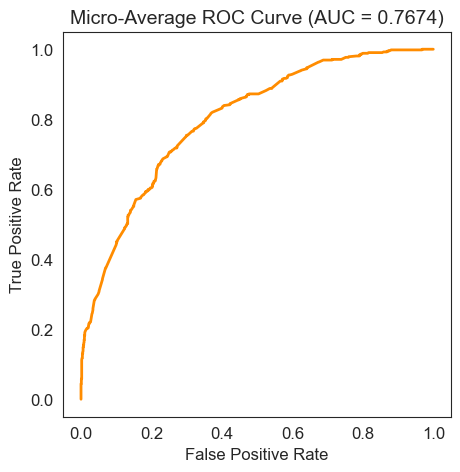

In [198]:
lda_def_results = classifier_metrics('LDA_default', lda, X_train_sc, y_train, X_test_sc, y_test)

In [199]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.59556
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.59556
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.57638


### ➡️ Hyperparameter Tuning for Model Optimization

In [115]:
start = time.time()

params = {
            'solver': ['svd', 'lsqr', 'eigen'],
            'tol': [0.00001, 0.0001, 0.01, 0.1, 0.2],
}

lda = LinearDiscriminantAnalysis()
lda_grid = GridSearchCV(lda, params, cv=5, n_jobs=-1)
lda_grid.fit(X_train_sc, y_train)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)


print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', lda_grid.best_params_)
print('Best Cross-Validation Score:', lda_grid.best_score_)

Time taken by Grid Search over 15 combinations of hyperparameters 4.112496852874756
Best Parameters: {'solver': 'svd', 'tol': 1e-05}
Best Cross-Validation Score: 0.6308652372764384


In [200]:
lda_best = lda_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6308652372764384
Confusion Matrix
 [[586   8 304]
 [ 30  34 274]
 [108  30 693]]


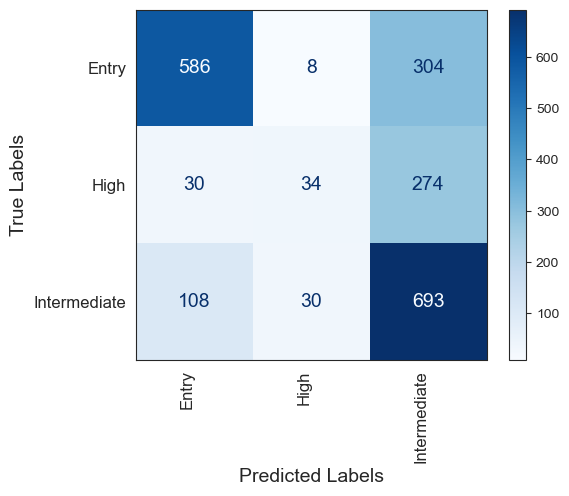

Classification Report:
               precision    recall  f1-score   support

       Entry       0.81      0.65      0.72       898
        High       0.47      0.10      0.17       338
Intermediate       0.55      0.83      0.66       831

    accuracy                           0.64      2067
   macro avg       0.61      0.53      0.52      2067
weighted avg       0.65      0.64      0.61      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6054158607350096
Confusion Matrix
 [[131   3  90]
 [  7   9  69]
 [ 30   5 173]]


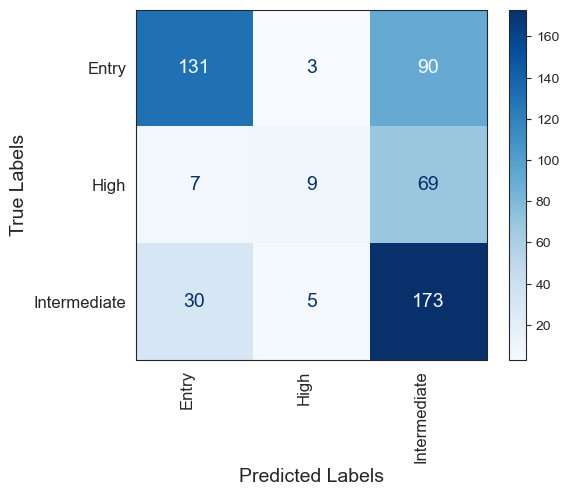

Classification Report:
               precision    recall  f1-score   support

       Entry       0.78      0.58      0.67       224
        High       0.53      0.11      0.18        85
Intermediate       0.52      0.83      0.64       208

    accuracy                           0.61       517
   macro avg       0.61      0.51      0.50       517
weighted avg       0.63      0.61      0.58       517



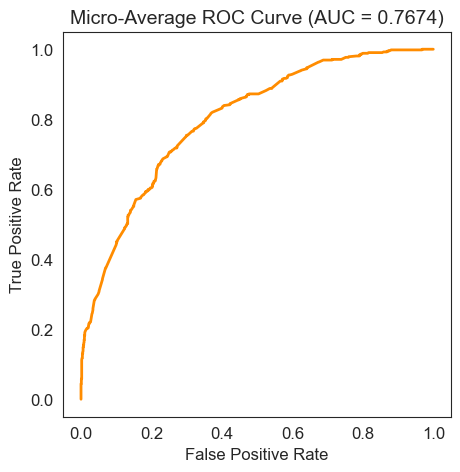

In [201]:
lda_tuned_results = classifier_metrics('LDA_tuned', lda_best, X_train_sc, y_train, X_test_sc, y_test)

In [202]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.59556
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.59556
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.57638
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.57638


### 🔴 __`KNN (K-Nearest Neighbors)`__

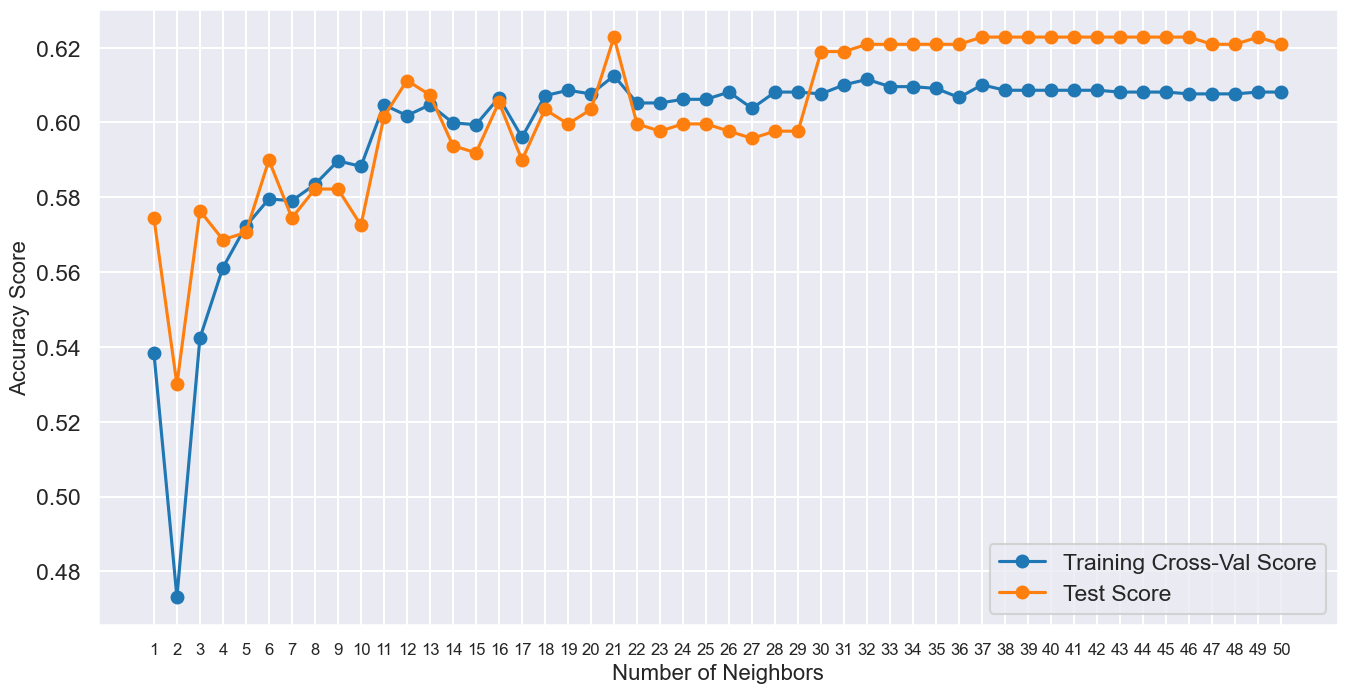

In [120]:
n_neighbors_range = range(1,51)
train_scores = []
test_scores = []

for i in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', n_jobs=-1)
    knn.fit(X_train_sc, y_train)
    y_test_pred = knn.predict(X_test_sc)

    train_score = cross_val_score(knn, X_train_sc, y_train, cv=5).mean()
    train_scores.append(train_score)

    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

plt.figure(figsize=(16,8))
plt.plot(n_neighbors_range, train_scores, 'o-', label='Training Cross-Val Score')
plt.plot(n_neighbors_range, test_scores, 'o-', label='Test Score')
plt.xlabel('Number of Neighbors', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16)
plt.xticks(n_neighbors_range, fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

### From the preliminary testing of the 'n_neighbors' parameter, a value of `'n_neighbors=21'` appears to be optimal.

In [121]:
knn = KNeighborsClassifier(n_neighbors=21, weights='distance', n_jobs=-1)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=21, weights='distance')

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6124773367956861
Confusion Matrix
 [[678   4 216]
 [ 38  59 241]
 [155  29 647]]


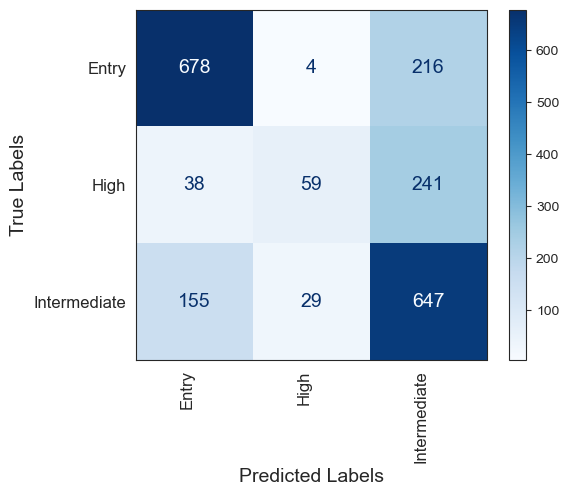

Classification Report:
               precision    recall  f1-score   support

       Entry       0.78      0.76      0.77       898
        High       0.64      0.17      0.27       338
Intermediate       0.59      0.78      0.67       831

    accuracy                           0.67      2067
   macro avg       0.67      0.57      0.57      2067
weighted avg       0.68      0.67      0.65      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6228239845261122
Confusion Matrix
 [[156   3  65]
 [  7  10  68]
 [ 46   6 156]]


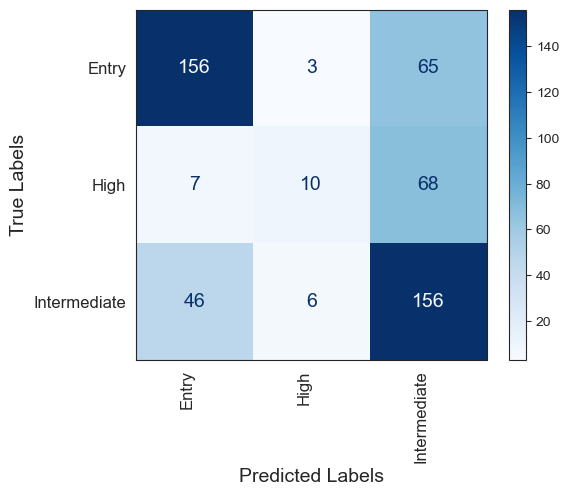

Classification Report:
               precision    recall  f1-score   support

       Entry       0.75      0.70      0.72       224
        High       0.53      0.12      0.19        85
Intermediate       0.54      0.75      0.63       208

    accuracy                           0.62       517
   macro avg       0.60      0.52      0.51       517
weighted avg       0.63      0.62      0.60       517



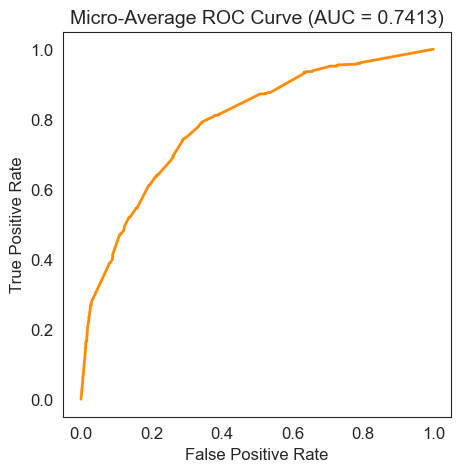

In [203]:
knn_results = classifier_metrics('KNN', knn, X_train_sc, y_train, X_test_sc, y_test)

In [204]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results, knn_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375


### 🔴 __`SVM (Support Vector Machine)`__

### ➡️ Default Parameter Configuration

In [206]:
svm = SVC(random_state=seed,probability=True)
svm.fit(X_train_sc,y_train)

SVC(probability=True, random_state=3)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6192616766677194
Confusion Matrix
 [[625   1 272]
 [ 34  24 280]
 [133   8 690]]


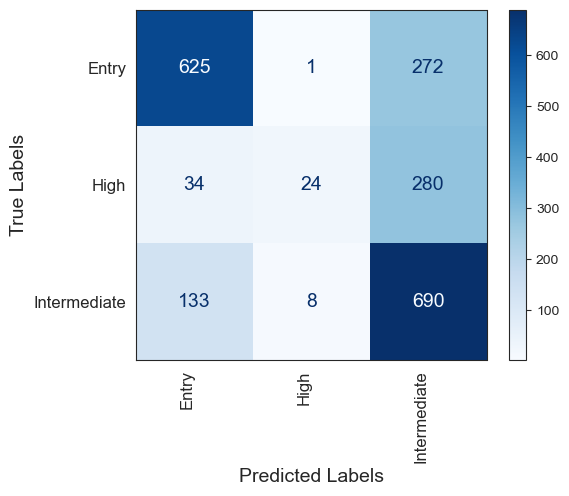

Classification Report:
               precision    recall  f1-score   support

       Entry       0.79      0.70      0.74       898
        High       0.73      0.07      0.13       338
Intermediate       0.56      0.83      0.67       831

    accuracy                           0.65      2067
   macro avg       0.69      0.53      0.51      2067
weighted avg       0.69      0.65      0.61      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.620889748549323
Confusion Matrix
 [[146   1  77]
 [  8   4  73]
 [ 34   3 171]]


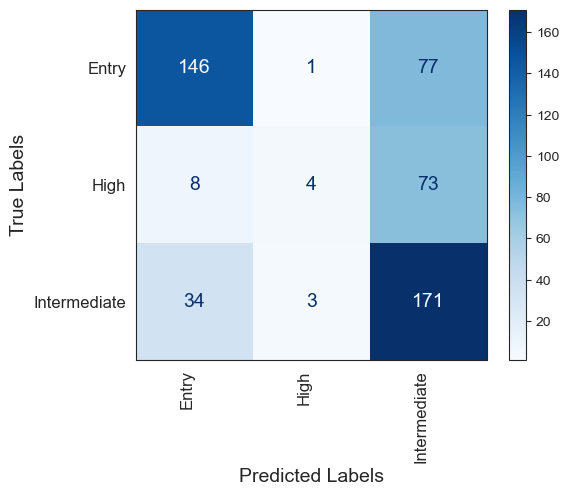

Classification Report:
               precision    recall  f1-score   support

       Entry       0.78      0.65      0.71       224
        High       0.50      0.05      0.09        85
Intermediate       0.53      0.82      0.65       208

    accuracy                           0.62       517
   macro avg       0.60      0.51      0.48       517
weighted avg       0.63      0.62      0.58       517



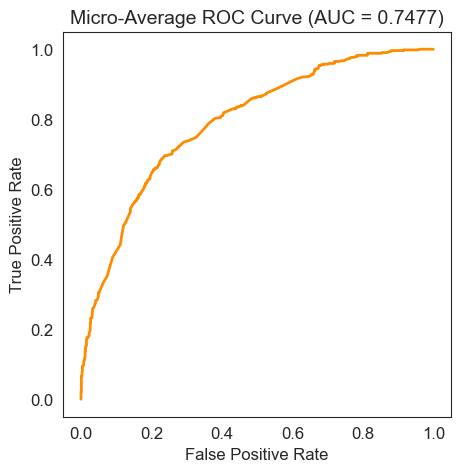

In [207]:
svm_def_results = classifier_metrics('SVM_default', svm, X_train_sc, y_train, X_test_sc, y_test)

In [208]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results, knn_results, svm_def_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319


### ➡️ Hyperparameter Tuning for Model Optimization

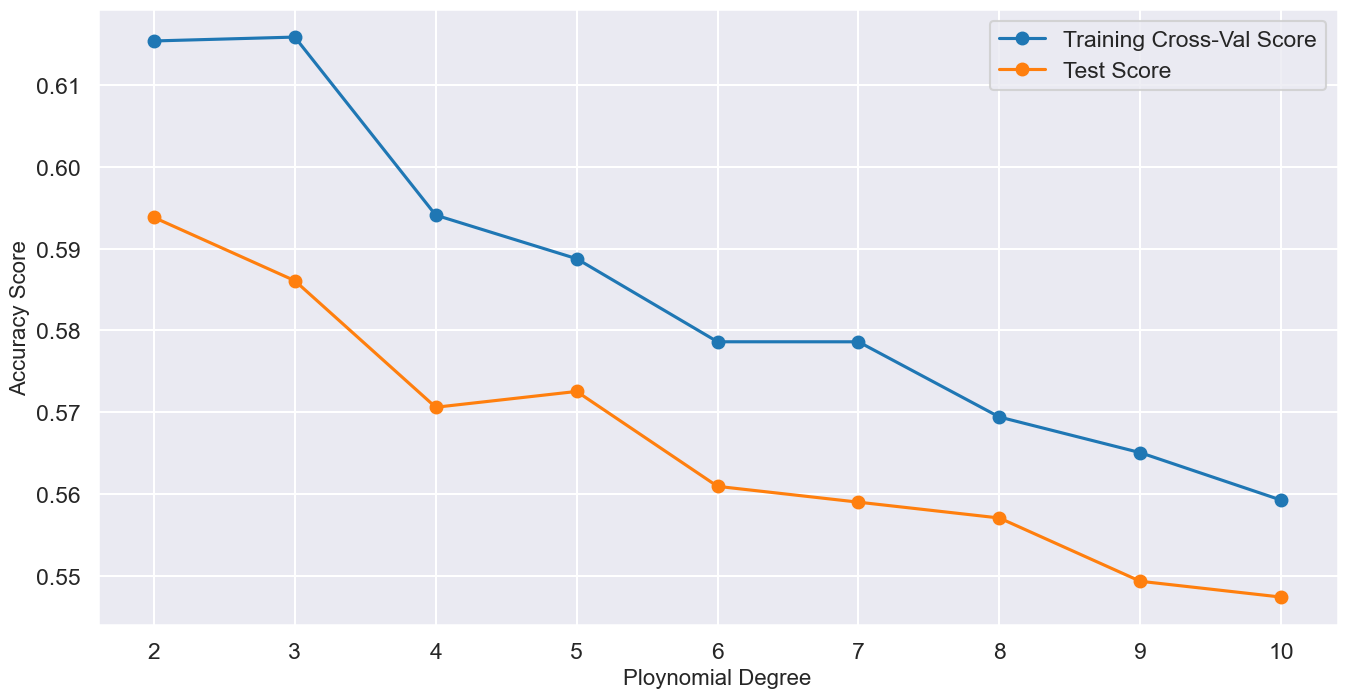

In [127]:
n_degree_range = range(2,11)
train_scores = []
test_scores = []

for i in n_degree_range:
    svm = SVC(kernel='poly', degree=i, random_state=seed)
    svm.fit(X_train_sc, y_train)
    y_train_pred = svm.predict(X_train_sc)
    y_test_pred = svm.predict(X_test_sc)

    train_score = cross_val_score(svm, X_train_sc, y_train, cv=5).mean()
    train_scores.append(train_score)

    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

plt.figure(figsize=(16,8))
plt.plot(n_degree_range, train_scores, 'o-', label='Training Cross-Val Score')
plt.plot(n_degree_range, test_scores, 'o-', label='Test Score')
plt.xlabel('Ploynomial Degree', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


### At a polynomial degree of 3, both the training and test sets achieve the highest scores.

In [128]:
start = time.time()

params = {      
            'C' : [0.1, 0.5, 1, 2, 5, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2,3,4,5],
            'gamma' : [0.03, 0.3, 1, 'scale', 'auto']   
}

svm = SVC(random_state=seed,probability=True)
svm_grid = GridSearchCV(svm, params, cv=5, n_jobs=-1)
svm_grid.fit(X_train_sc, y_train)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)

print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', svm_grid.best_params_)
print('Best Cross-Validation Score:', svm_grid.best_score_)

Time taken by Grid Search over 480 combinations of hyperparameters 1605.115822315216
Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 0.03, 'kernel': 'sigmoid'}
Best Cross-Validation Score: 0.6216806447462305


In [130]:
svm_best = svm_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6216806447462305
Confusion Matrix
 [[571   0 327]
 [ 32   0 306]
 [117   0 714]]


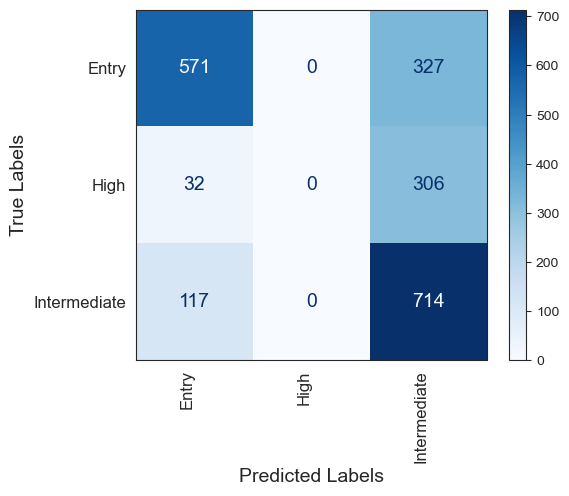

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

       Entry       0.79      0.64      0.71       898
        High       0.00      0.00      0.00       338
Intermediate       0.53      0.86      0.66       831

    accuracy                           0.62      2067
   macro avg       0.44      0.50      0.45      2067
weighted avg       0.56      0.62      0.57      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.586073500967118
Confusion Matrix
 [[125   0  99]
 [  8   0  77]
 [ 30   0 178]]


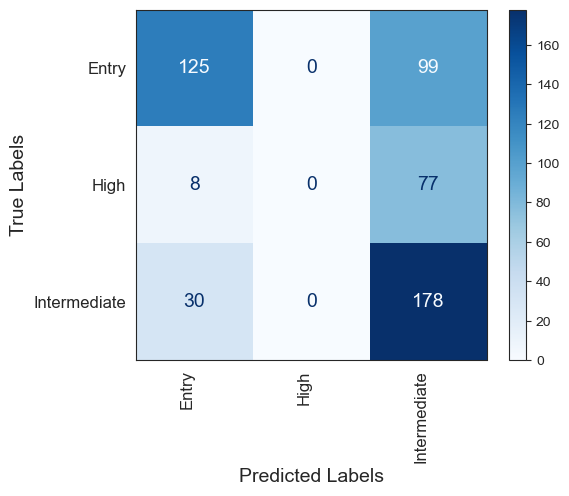

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

       Entry       0.77      0.56      0.65       224
        High       0.00      0.00      0.00        85
Intermediate       0.50      0.86      0.63       208

    accuracy                           0.59       517
   macro avg       0.42      0.47      0.43       517
weighted avg       0.53      0.59      0.53       517



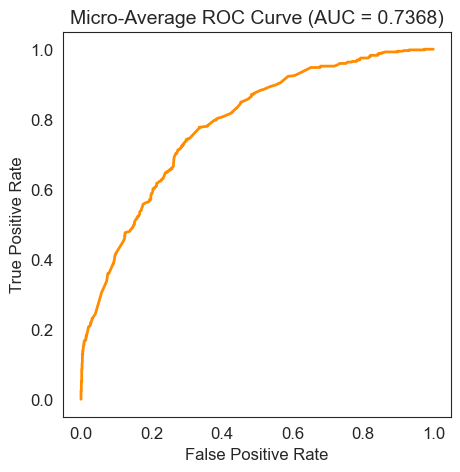

In [209]:
svm_tuned_results = classifier_metrics('SVM_tuned', svm_best, X_train_sc, y_train, X_test_sc, y_test)

In [210]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results, knn_results, svm_def_results, svm_tuned_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319
SVM_tuned,0.621681,0.586074,0.757978,0.736769,0.570227,0.534741


### 🔴 __`RandomForest`__

### ➡️ Default Parameter Configuration

In [211]:
rfc = RandomForestClassifier(random_state=seed,n_jobs=-1)
rfc.fit(X_train_sc,y_train)

RandomForestClassifier(n_jobs=-1, random_state=3)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6076429097799768
Confusion Matrix
 [[651   4 243]
 [ 30  49 259]
 [124  19 688]]


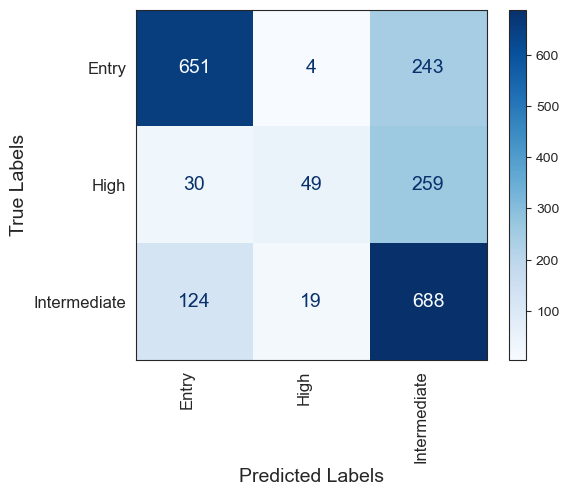

Classification Report:
               precision    recall  f1-score   support

       Entry       0.81      0.72      0.76       898
        High       0.68      0.14      0.24       338
Intermediate       0.58      0.83      0.68       831

    accuracy                           0.67      2067
   macro avg       0.69      0.57      0.56      2067
weighted avg       0.70      0.67      0.64      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6266924564796905
Confusion Matrix
 [[151   2  71]
 [  8   8  69]
 [ 39   4 165]]


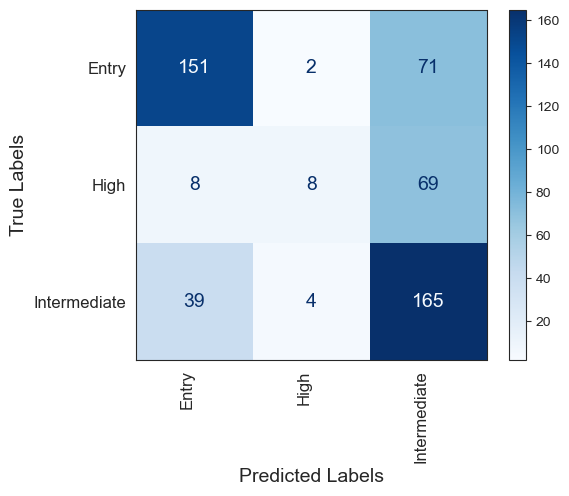

Classification Report:
               precision    recall  f1-score   support

       Entry       0.76      0.67      0.72       224
        High       0.57      0.09      0.16        85
Intermediate       0.54      0.79      0.64       208

    accuracy                           0.63       517
   macro avg       0.63      0.52      0.51       517
weighted avg       0.64      0.63      0.60       517



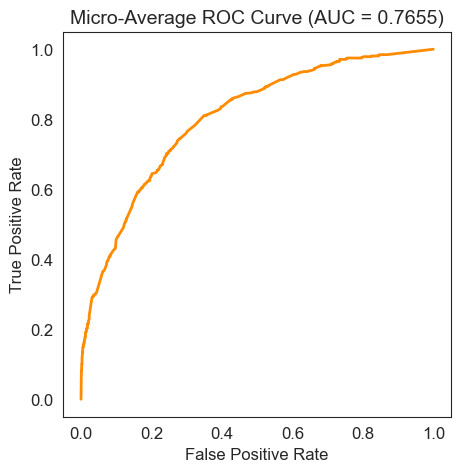

In [212]:
rfc_def_results = classifier_metrics('RandomFroest_default', rfc, X_train_sc, y_train, X_test_sc, y_test)

In [213]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results, knn_results, svm_def_results, svm_tuned_results, rfc_def_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319
SVM_tuned,0.621681,0.586074,0.757978,0.736769,0.570227,0.534741
RandomFroest_default,0.607643,0.626692,0.821413,0.765531,0.644958,0.595439


### ➡️ Hyperparameter Tuning for Model Optimization

## `n_estimators`

Best Test Score--> 0.6266924564796905
Best Test N_Estimator--> 100
Best Train Cross-Val Score--> 0.6149021534430525
Best Train N_Estimator--> 60


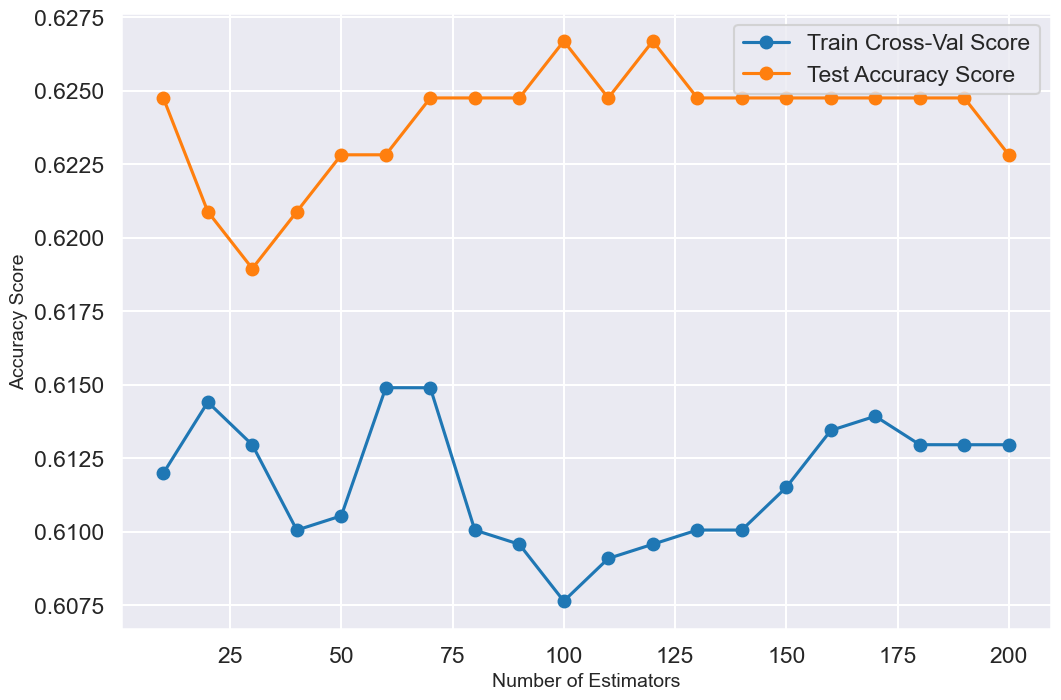

In [136]:
n_estimators_range = range(10, 201, 10)
train_scores = []
test_scores = []

for i in n_estimators_range:
    rfc = RandomForestClassifier(n_estimators=i, random_state=seed, n_jobs=-1)
    rfc.fit(X_train_sc, y_train)
    y_train_pred = rfc.predict(X_train_sc)
    y_test_pred = rfc.predict(X_test_sc)

    #train set
    train_score = cross_val_score(rfc, X_train_sc, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

print("Best Test Score-->", max(test_scores))
print("Best Test N_Estimator-->", (np.array(test_scores).argmax()*10+10))
print("Best Train Cross-Val Score-->", max(train_scores))
print("Best Train N_Estimator-->", (np.array(train_scores).argmax()*10+10))

plt.figure(figsize=(12,8))
plt.plot(n_estimators_range, train_scores, 'o-', label='Train Cross-Val Score')
plt.plot(n_estimators_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### From the graph, the range for `n_estimators` can be explored between 60 and 120.

## `max_depth`

Best Test Score--> 0.632495164410058
Best Test Max_Depth 13
Best Train Cross-Val Score--> 0.6250517598343686
Best Train Max_Depth--> 7


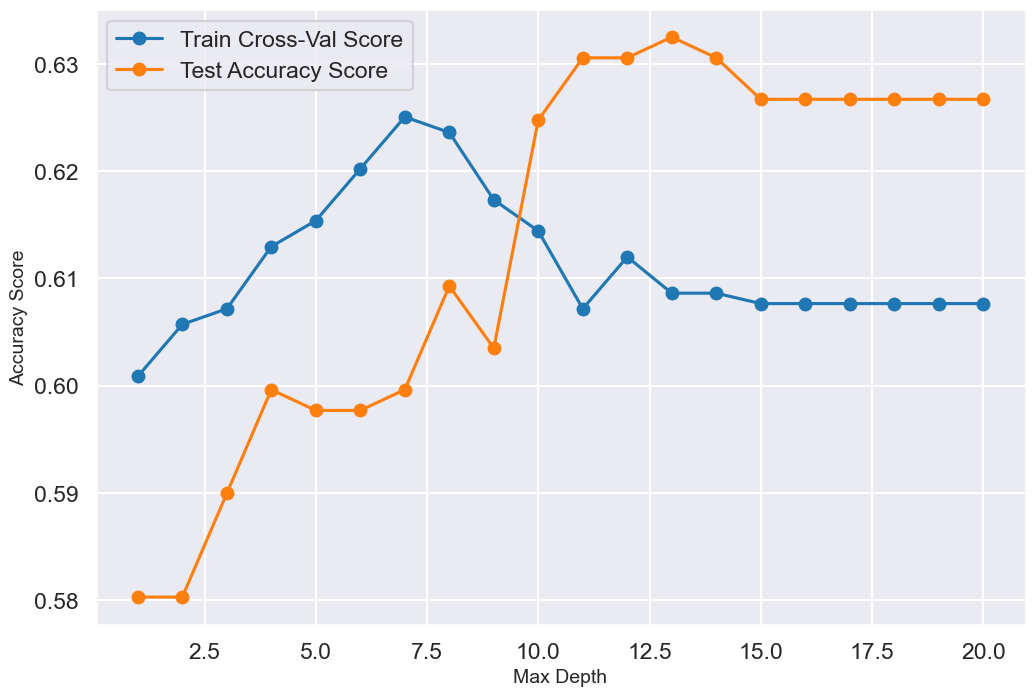

In [138]:
max_depth_range = range(1,21)
train_scores = []
test_scores = []

for i in max_depth_range:
    rfc = RandomForestClassifier(max_depth=i, random_state=seed, n_jobs=-1)
    rfc.fit(X_train_sc, y_train)
    y_train_pred = rfc.predict(X_train_sc)
    y_test_pred = rfc.predict(X_test_sc)

    #train set
    train_score = cross_val_score(rfc, X_train_sc, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

print("Best Test Score-->", max(test_scores))
print("Best Test Max_Depth", np.array(test_scores).argmax()+1)
print("Best Train Cross-Val Score-->", max(train_scores))
print("Best Train Max_Depth-->", np.array(train_scores).argmax()+1)

plt.figure(figsize=(12,8))
plt.plot(max_depth_range, train_scores, 'o-', label='Train Cross-Val Score')
plt.plot(max_depth_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### From the graph, the range for `max_depth` could be further investigated between 7 and 15.

## `max_features`

Best Test Score--> 0.6305609284332688
Best Test Max_Features 0.1
Best Train Cross-Val Score--> 0.6119977541495596
Best Train Max_Features--> 0.8


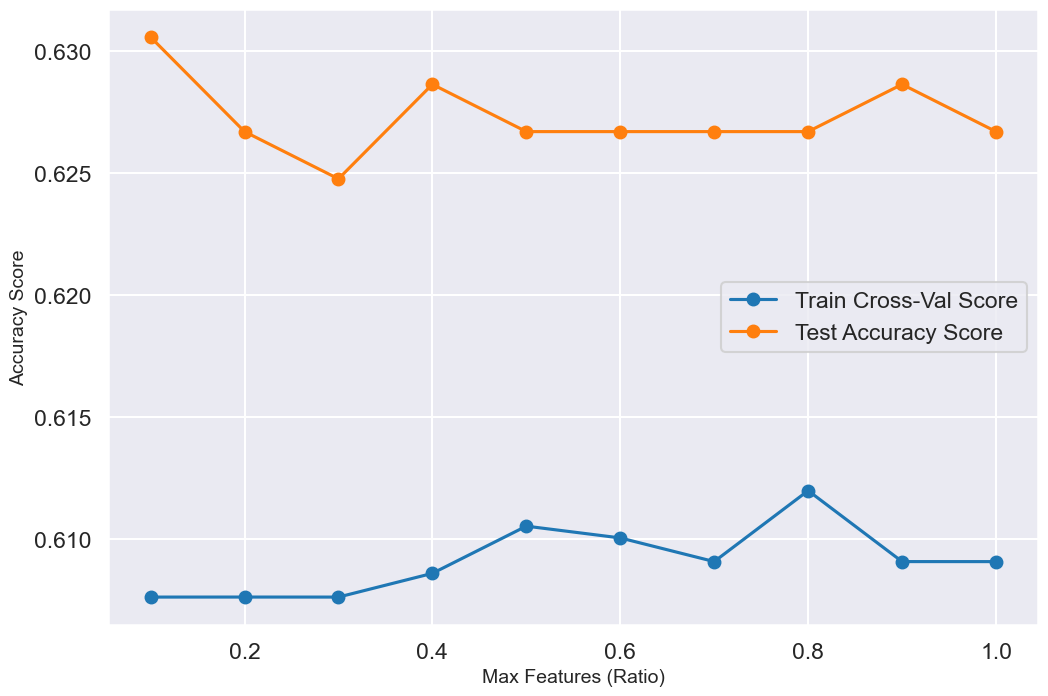

In [139]:
max_features_range = np.linspace(0.1,1,10)
train_scores = []
test_scores = []

for i in max_features_range:
    rfc = RandomForestClassifier(max_features=i, random_state=seed, n_jobs=-1)
    rfc.fit(X_train_sc, y_train)
    y_train_pred = rfc.predict(X_train_sc)
    y_test_pred = rfc.predict(X_test_sc)

    #train set
    train_score = cross_val_score(rfc, X_train_sc, y_train, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_score)

print("Best Test Score-->", max(test_scores))
print("Best Test Max_Features", (np.array(test_scores).argmax()*0.1+0.1))
print("Best Train Cross-Val Score-->", max(train_scores))
print("Best Train Max_Features-->", (np.array(train_scores).argmax()*0.1+0.1))

plt.figure(figsize=(12,8))
plt.plot(max_features_range, train_scores, 'o-', label='Train Cross-Val Score')
plt.plot(max_features_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Max Features (Ratio)', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### From the graph, the range for `max_features` can be further explored between 0.1 and 0.8.

In [218]:
start = time.time()

params = {
            'n_estimators': list(range(60,120,10)),
            'max_depth': list(range(7,15,1)),
            'max_features': list(np.arange(0.1, 1, 0.1)),
            "min_samples_split": [2,4,6,8,10,12],
            'class_weight': [None, "balanced"]
}

rfc = RandomForestClassifier(random_state=seed, n_jobs=-1)
rfc_grid = GridSearchCV(rfc, params, cv=5, n_jobs=-1)
rfc_grid.fit(X_train_sc, y_train)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)

print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', rfc_grid.best_params_)
print('Best Cross-Validation Score:', rfc_grid.best_score_)

Time taken by Grid Search over 5184 combinations of hyperparameters 1304.2928502559662
Best Parameters: {'class_weight': None, 'max_depth': 7, 'max_features': 0.5, 'min_samples_split': 8, 'n_estimators': 110}
Best Cross-Validation Score: 0.6342538980711419


In [219]:
rfc_best = rfc_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6342538980711419
Confusion Matrix
 [[607   1 290]
 [ 28  29 281]
 [110  10 711]]


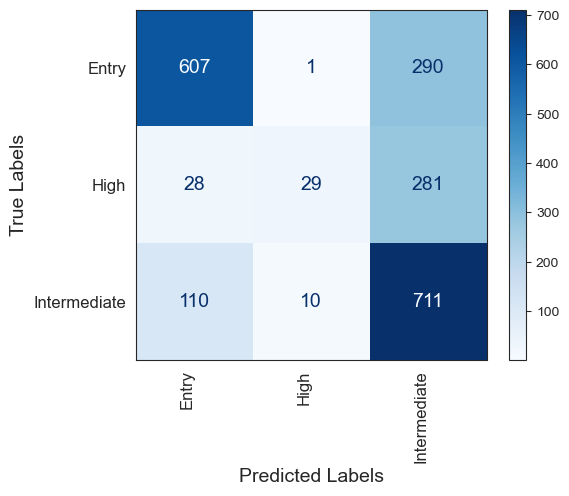

Classification Report:
               precision    recall  f1-score   support

       Entry       0.81      0.68      0.74       898
        High       0.72      0.09      0.15       338
Intermediate       0.55      0.86      0.67       831

    accuracy                           0.65      2067
   macro avg       0.70      0.54      0.52      2067
weighted avg       0.70      0.65      0.62      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.597678916827853
Confusion Matrix
 [[133   1  90]
 [ 10   5  70]
 [ 34   3 171]]


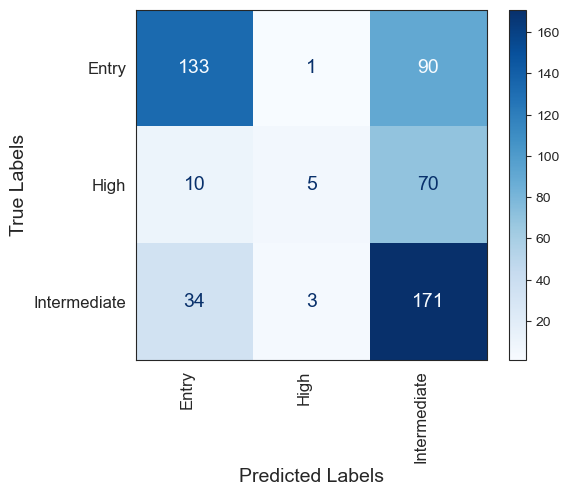

Classification Report:
               precision    recall  f1-score   support

       Entry       0.75      0.59      0.66       224
        High       0.56      0.06      0.11        85
Intermediate       0.52      0.82      0.63       208

    accuracy                           0.60       517
   macro avg       0.61      0.49      0.47       517
weighted avg       0.62      0.60      0.56       517



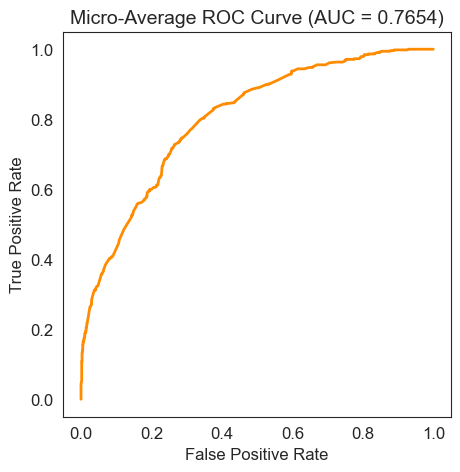

In [220]:
rfc_tuned_results = classifier_metrics('RandomForest_tuned', rfc_best, X_train_sc, y_train, X_test_sc, y_test)

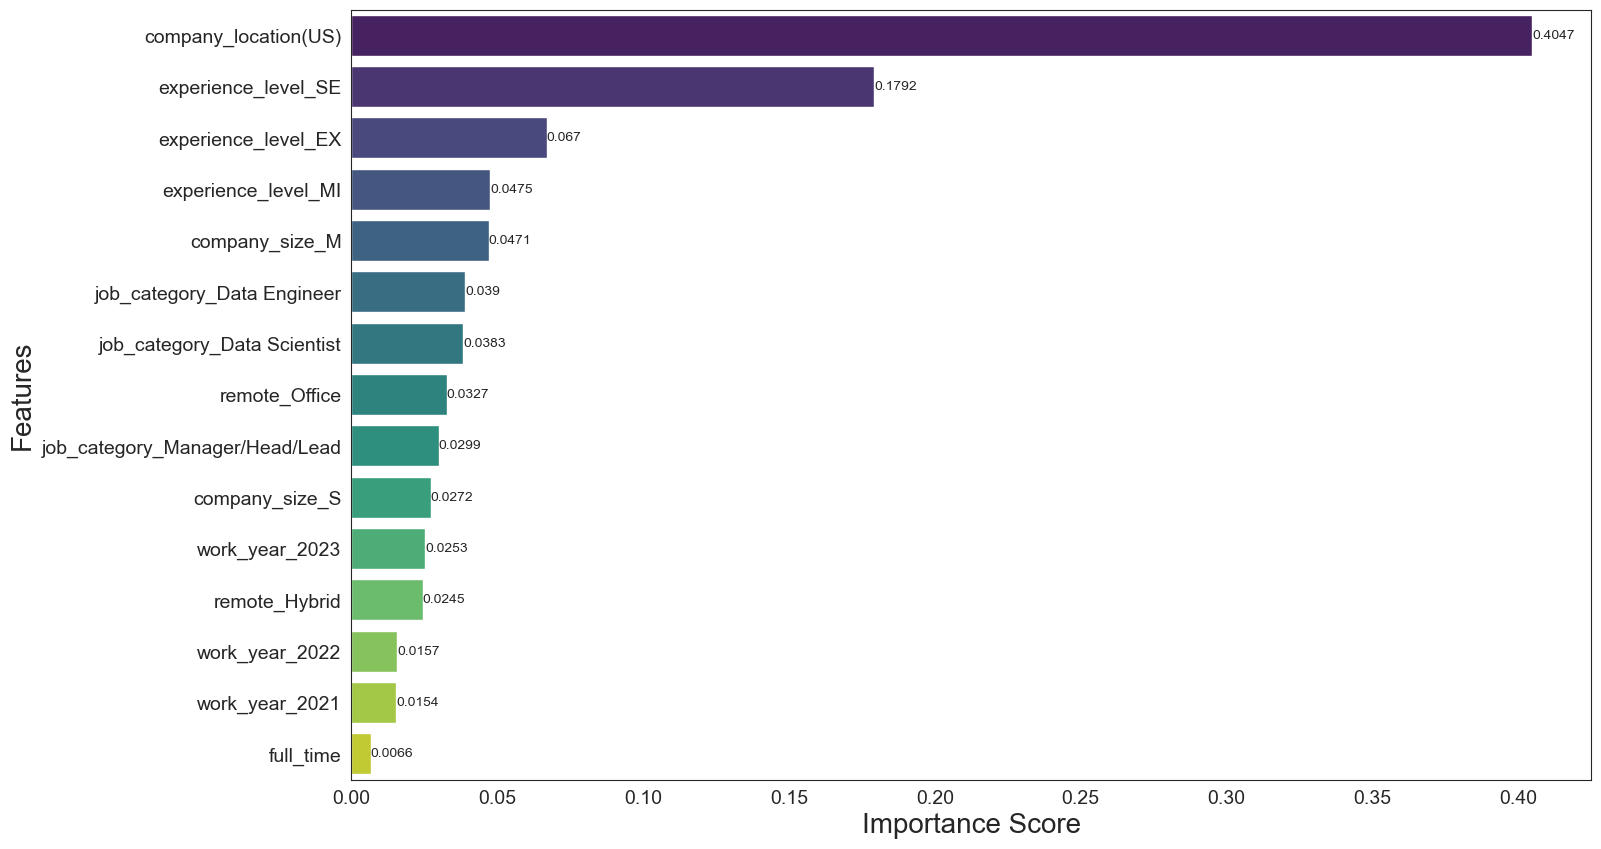

In [221]:
feature_importances = pd.DataFrame({'Features': X_train_sc.columns, "Importance Score": rfc_best.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

plt.figure(figsize=(16,10))
ax = sns.barplot(data=feature_importances, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()


In [222]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results, \
                        knn_results, svm_def_results, svm_tuned_results, rfc_def_results, rfc_tuned_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319
SVM_tuned,0.621681,0.586074,0.757978,0.736769,0.570227,0.534741
RandomFroest_default,0.607643,0.626692,0.821413,0.765531,0.644958,0.595439
RandomForest_tuned,0.634254,0.597679,0.798901,0.765361,0.616658,0.560172


# SMOTE - Imbalanced Dataset

In [39]:
rfc_smot = RandomForestClassifier(n_estimators=110, max_depth=7, max_features=0.5, min_samples_split=8, random_state=seed,n_jobs=-1)
rfc_smot.fit(X_train_smsc,y_train_sm)

RandomForestClassifier(max_depth=7, max_features=0.5, min_samples_split=8,
                       n_estimators=110, n_jobs=-1, random_state=3)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.5668213889137947
Confusion Matrix
 [[597 121 180]
 [ 71 567 260]
 [113 358 427]]


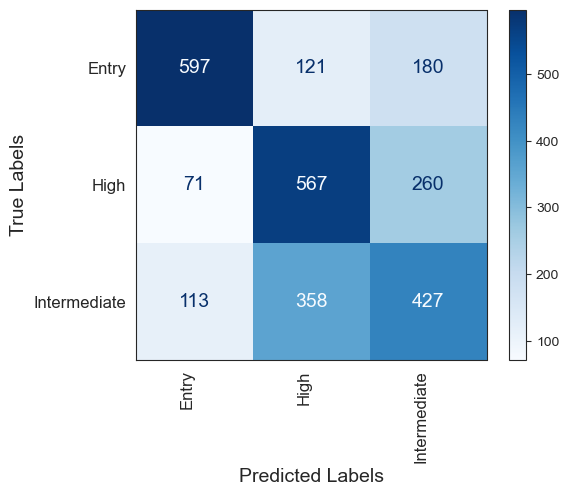

Classification Report:
               precision    recall  f1-score   support

       Entry       0.76      0.66      0.71       898
        High       0.54      0.63      0.58       898
Intermediate       0.49      0.48      0.48       898

    accuracy                           0.59      2694
   macro avg       0.60      0.59      0.59      2694
weighted avg       0.60      0.59      0.59      2694

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.5299806576402321
Confusion Matrix
 [[132  33  59]
 [ 10  56  19]
 [ 33  89  86]]


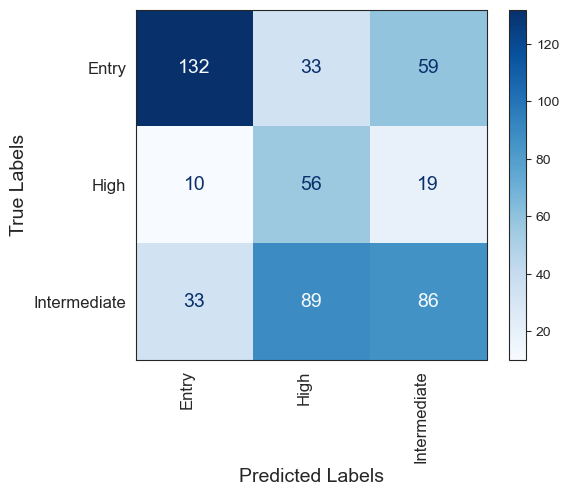

Classification Report:
               precision    recall  f1-score   support

       Entry       0.75      0.59      0.66       224
        High       0.31      0.66      0.43        85
Intermediate       0.52      0.41      0.46       208

    accuracy                           0.53       517
   macro avg       0.53      0.55      0.52       517
weighted avg       0.59      0.53      0.54       517



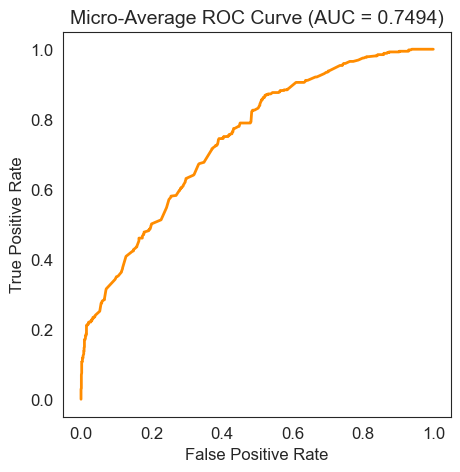

In [43]:
df_rfc_smot = classifier_metrics('RandomForest_SMOT', rfc_smot, X_train_smsc, y_train_sm, X_test_smsc, y_test)

In [44]:
df_smot_results = pd.concat([df_lg_smot, df_rfc_smot])
df_smot_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_SMOT,0.553827,0.547389,0.753664,0.752051,0.566318,0.560876
RandomForest_SMOT,0.566821,0.529981,0.783039,0.749402,0.592775,0.542708


### 🔴 __`XGBoost`__

### ➡️ Default Parameter Configuration

In [223]:
y_train_xgb = y_train.map({"Entry": 0, "High": 1, "Intermediate": 2})
y_test_xgb = y_test.map({"Entry": 0, "High": 1, "Intermediate": 2})             

In [224]:
xgb = XGBClassifier(random_state=seed,n_jobs=-1)
xgb.fit(X_train_sc, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6110304008609093
Confusion Matrix
 [[634   4 260]
 [ 23  51 264]
 [113  20 698]]


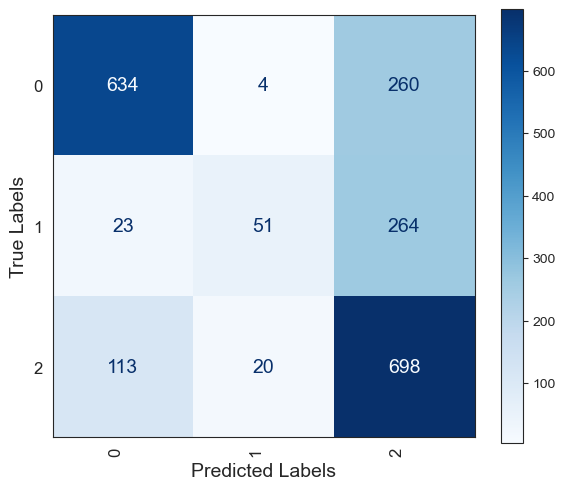

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       898
           1       0.68      0.15      0.25       338
           2       0.57      0.84      0.68       831

    accuracy                           0.67      2067
   macro avg       0.69      0.57      0.56      2067
weighted avg       0.70      0.67      0.64      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.6189555125725339
Confusion Matrix
 [[146   3  75]
 [  7   8  70]
 [ 34   8 166]]


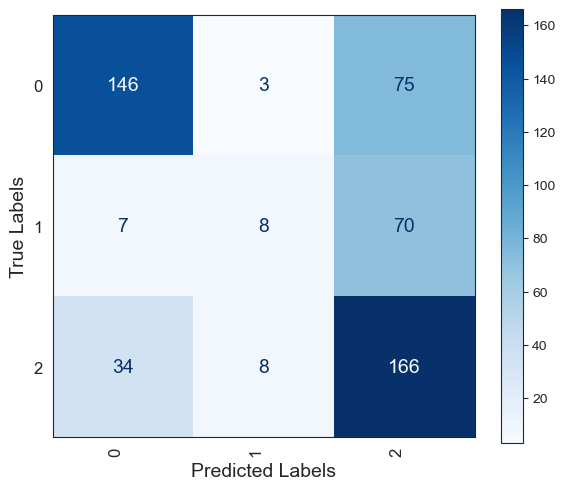

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71       224
           1       0.42      0.09      0.15        85
           2       0.53      0.80      0.64       208

    accuracy                           0.62       517
   macro avg       0.58      0.51      0.50       517
weighted avg       0.62      0.62      0.59       517



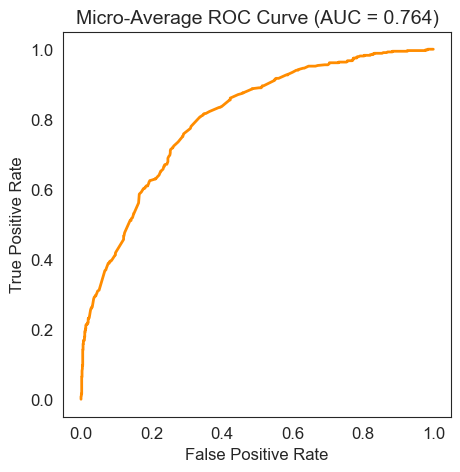

In [225]:
xgb_def_results = classifier_metrics('XGBoost_default', xgb, X_train_sc, y_train_xgb, X_test_sc, y_test_xgb)

In [226]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results, knn_results, \
                        svm_def_results, svm_tuned_results, rfc_def_results, rfc_tuned_results, xgb_def_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319
SVM_tuned,0.621681,0.586074,0.757978,0.736769,0.570227,0.534741
RandomFroest_default,0.607643,0.626692,0.821413,0.765531,0.644958,0.595439
RandomForest_tuned,0.634254,0.597679,0.798901,0.765361,0.616658,0.560172


### ➡️ Hyperparameter Tuning for Model Optimization

## `n_estimators`

Best Test Score--> 0.6247582205029013
Best Test N_Estimator--> 5
Best Train Cross-Val Score--> 0.6308699161315227
Best Train N_Estimator--> 10


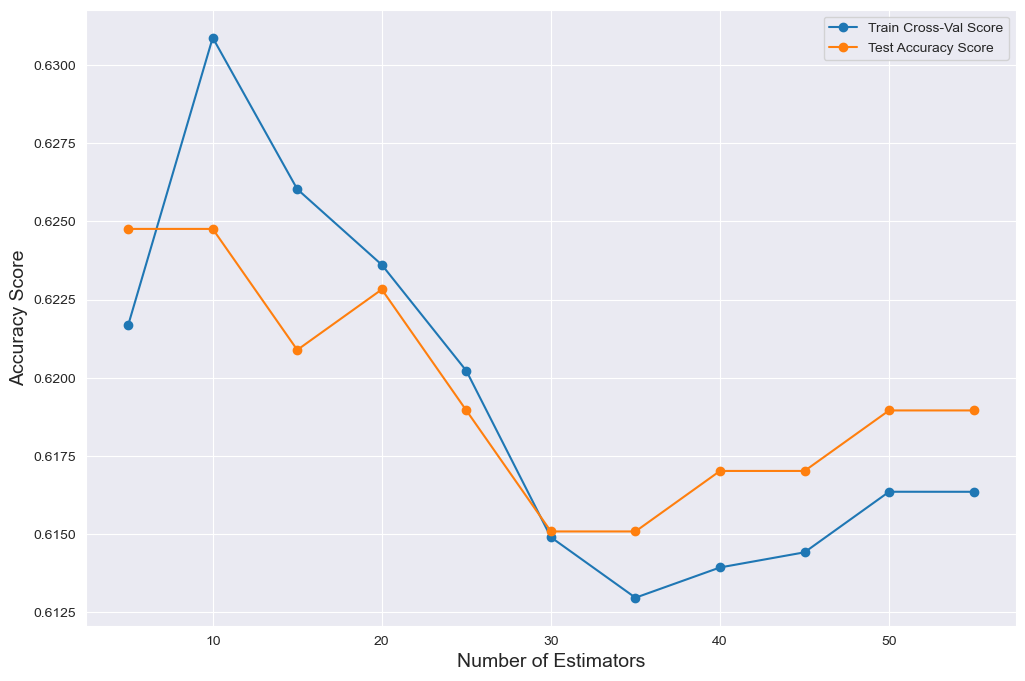

In [228]:
n_estimators_range = range(5, 60, 5)
train_scores = []
test_scores = []

for i in n_estimators_range:
    xgb = XGBClassifier(n_estimators=i, random_state=seed, n_jobs=-1)
    xgb.fit(X_train_sc, y_train_xgb)
    y_train_pred = xgb.predict(X_train_sc)
    y_test_pred = xgb.predict(X_test_sc)

    #train set
    train_score = cross_val_score(xgb, X_train_sc, y_train_xgb, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test_xgb, y_test_pred)
    test_scores.append(test_score)

print("Best Test Score-->", max(test_scores))
print("Best Test N_Estimator-->", (np.array(test_scores).argmax()*5+5))
print("Best Train Cross-Val Score-->", max(train_scores))
print("Best Train N_Estimator-->", (np.array(train_scores).argmax()*5+5))

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.plot(n_estimators_range, train_scores, 'o-', label='Train Cross-Val Score')
plt.plot(n_estimators_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### From the graph, the range for `n_estimators` can be explored between 5 to 15.

Best Test Score--> 0.6266924564796905
Best Test N_Estimator--> 4
Best Train Cross-Val Score--> 0.6274871039056743
Best Train N_Estimator--> 2


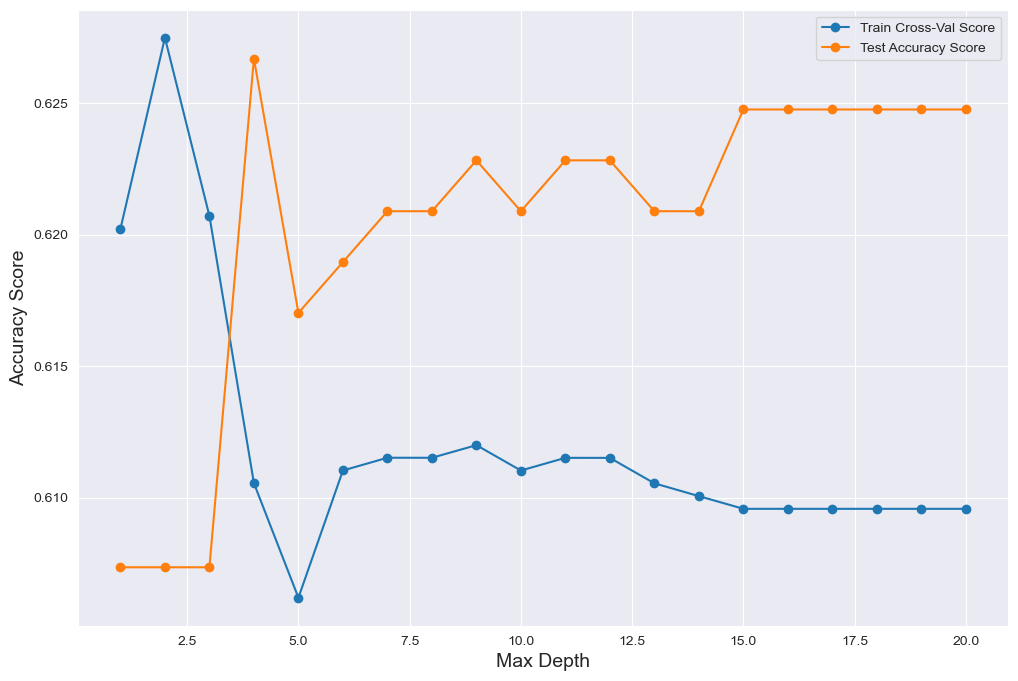

In [229]:
max_depth_range = range(1,21)
train_scores = []
test_scores = []

for i in max_depth_range:
    xgb = XGBClassifier(max_depth=i, random_state=seed, n_jobs=-1)
    xgb.fit(X_train_sc, y_train_xgb)
    y_train_pred = xgb.predict(X_train_sc)
    y_test_pred = xgb.predict(X_test_sc)

    #train set
    train_score = cross_val_score(xgb, X_train_sc, y_train_xgb, cv=5).mean()
    train_scores.append(train_score)

    #test set
    test_score = accuracy_score(y_test_xgb, y_test_pred)
    test_scores.append(test_score)

print("Best Test Score-->", max(test_scores))
print("Best Test N_Estimator-->", (np.array(test_scores).argmax()+1))
print("Best Train Cross-Val Score-->", max(train_scores))
print("Best Train N_Estimator-->", (np.array(train_scores).argmax()+1))

plt.figure(figsize=(12,8))
plt.plot(max_depth_range, train_scores, 'o-', label='Train Cross-Val Score')
plt.plot(max_depth_range, test_scores, 'o-', label='Test Accuracy Score')
plt.xlabel('Max Depth', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### From the graph, the range for `max_depth` could be further investigated between 1 and 4.

In [177]:
start = time.time()

params = {
            'n_estimators': list(range(5,16)),
            'max_depth': list(range(1,5)),
            'colsample_bytree': [0.1, 0.2, 0.4, 0.6, 0.8, 1],
            'learning_rate': [0.1,0.2,0.5,0.7,1],
            'gamma': [0, 1, 5, 10],
            'booster': ['gbtree', 'gblinear']
}

xgbc = XGBClassifier(random_state=seed, n_jobs=-1)
xgbc_grid = GridSearchCV(xgbc, params, cv=5, n_jobs=-1)
xgbc_grid.fit(X_train_sc, y_train_xgb)

end = time.time()
no_of_combinations = 1
for key, value in params.items():
    no_of_combinations *= len(value)

print(f"Time taken by Grid Search over {no_of_combinations} combinations of hyperparameters", end-start)
print('Best Parameters:', xgbc_grid.best_params_)
print('Best Cross-Validation Score:', xgbc_grid.best_score_)


Time taken by Grid Search over 10560 combinations of hyperparameters 205.7373342514038
Best Parameters: {'booster': 'gbtree', 'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 1, 'max_depth': 2, 'n_estimators': 13}
Best Cross-Validation Score: 0.6337684668561604


In [230]:
xgbc_best = xgbc_grid.best_estimator_

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TRAINING DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Cross-Val Score: 0.6337684668561604
Confusion Matrix
 [[603   5 290]
 [ 33  41 264]
 [126  24 681]]


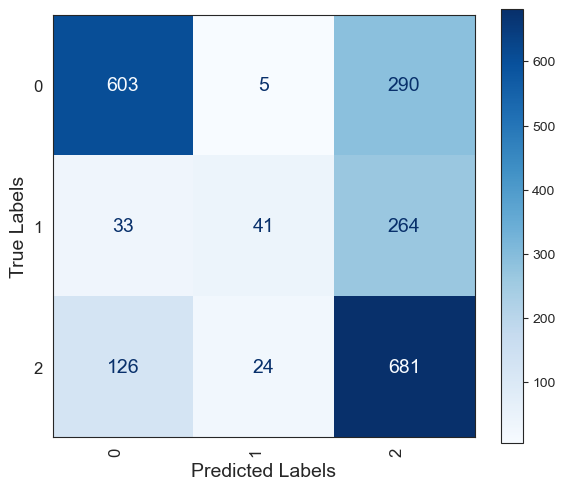

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.67      0.73       898
           1       0.59      0.12      0.20       338
           2       0.55      0.82      0.66       831

    accuracy                           0.64      2067
   macro avg       0.64      0.54      0.53      2067
weighted avg       0.66      0.64      0.61      2067

MODEL PERFORMANCE🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧TEST DATASET🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧🟧
Accuracy Score: 0.5996131528046421
Confusion Matrix
 [[134   3  87]
 [ 10   8  67]
 [ 34   6 168]]


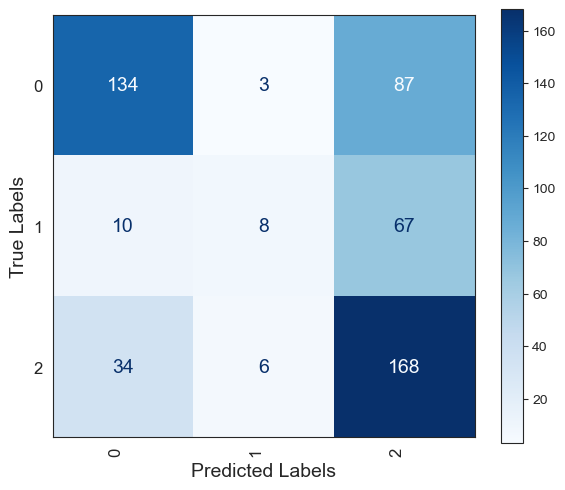

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67       224
           1       0.47      0.09      0.16        85
           2       0.52      0.81      0.63       208

    accuracy                           0.60       517
   macro avg       0.58      0.50      0.49       517
weighted avg       0.61      0.60      0.57       517



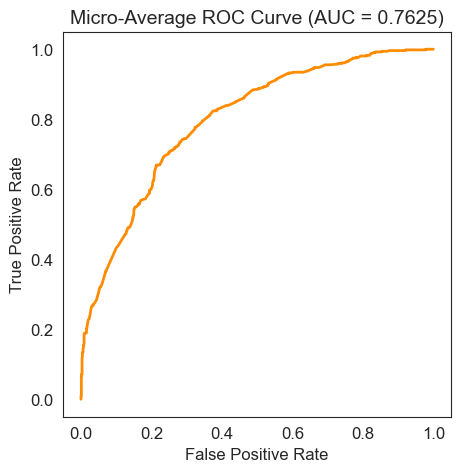

In [232]:
xgbc_tuned_results = classifier_metrics('XGBoost_tuned', xgbc_best, X_train_sc, y_train_xgb, X_test_sc, y_test_xgb)

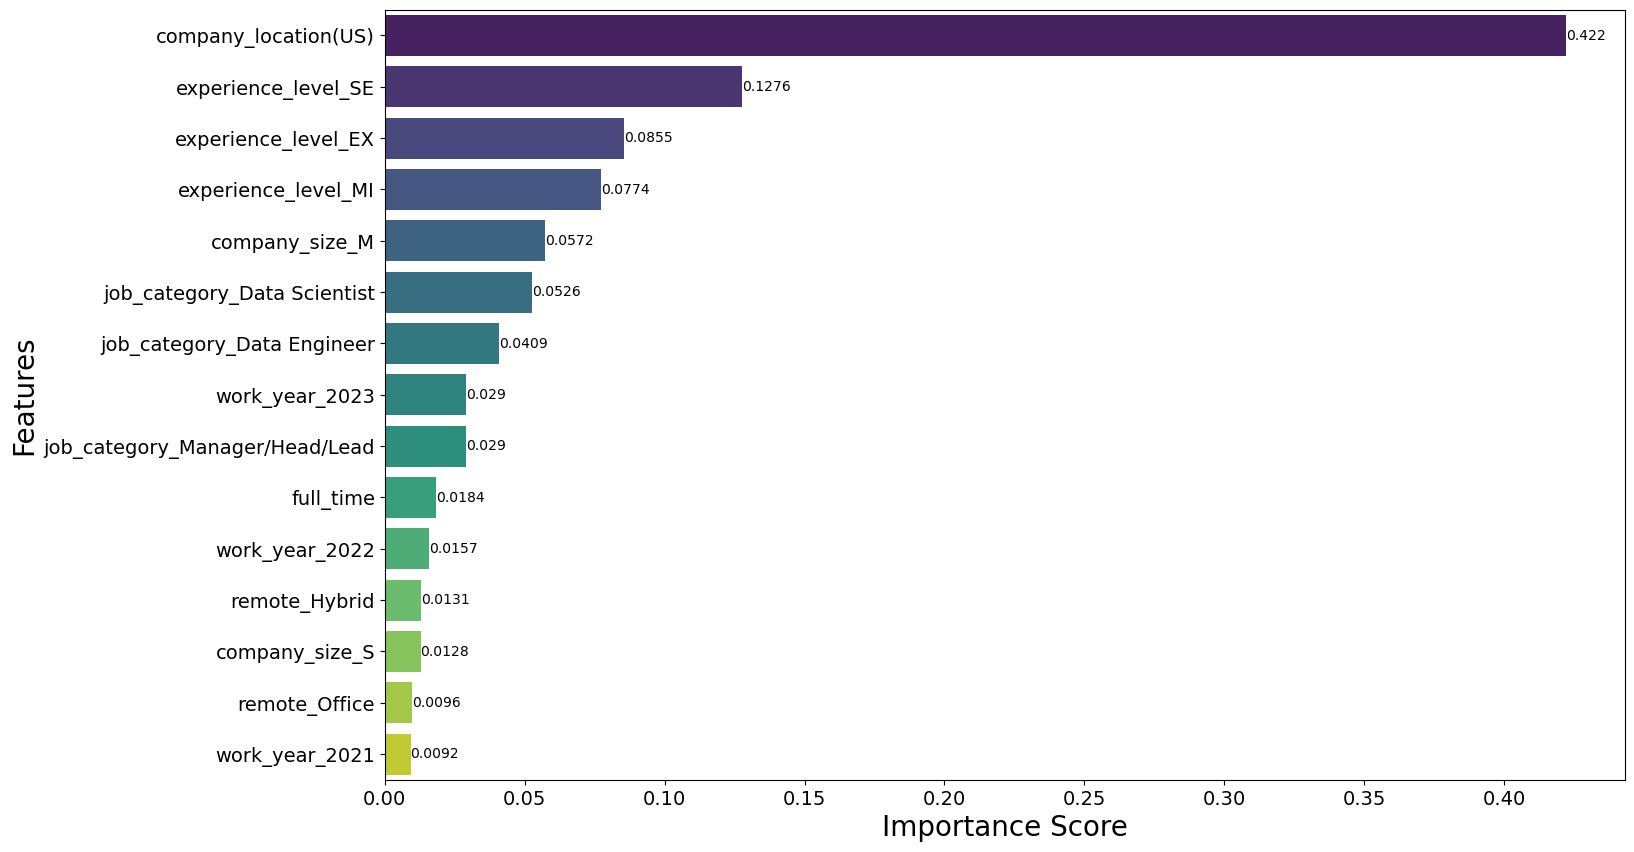

In [181]:
feature_importances = pd.DataFrame({'Features': X_train_sc.columns, "Importance Score": xgbc_best.feature_importances_})
feature_importances['Importance Score'] = feature_importances['Importance Score'].round(4)
feature_importances.sort_values("Importance Score", ascending=False, inplace=True)
feature_importances.set_index("Features", inplace=True)

plt.figure(figsize=(16,10))
ax = sns.barplot(data=feature_importances, x='Importance Score', y='Features', hue='Features', palette="viridis")
for cnts in ax.containers:
    ax.bar_label(cnts, fontsize=10)

# feature_importances.plot(kind='barh', legend=False)
plt.xlabel('Importance Score', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

In [233]:
df_results = pd.concat([lg_def_results, lg_tuned_results, lda_def_results, lda_tuned_results, knn_results, \
                        svm_def_results, svm_tuned_results, rfc_def_results, rfc_tuned_results, xgb_def_results, xgbc_tuned_results])
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319
SVM_tuned,0.621681,0.586074,0.757978,0.736769,0.570227,0.534741
RandomFroest_default,0.607643,0.626692,0.821413,0.765531,0.644958,0.595439
RandomForest_tuned,0.634254,0.597679,0.798901,0.765361,0.616658,0.560172


# Performance Comparison Across All Models

In [234]:
df_results_plot = df_results.reset_index()

In [235]:
df_results_plot

,Model,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
0,LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
1,LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
2,LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
3,LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
4,KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
5,SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319
6,SVM_tuned,0.621681,0.586074,0.757978,0.736769,0.570227,0.534741
7,RandomFroest_default,0.607643,0.626692,0.821413,0.765531,0.644958,0.595439
8,RandomForest_tuned,0.634254,0.597679,0.798901,0.765361,0.616658,0.560172
9,XGBoost_default,0.611030,0.618956,0.820456,0.763966,0.644022,0.590477


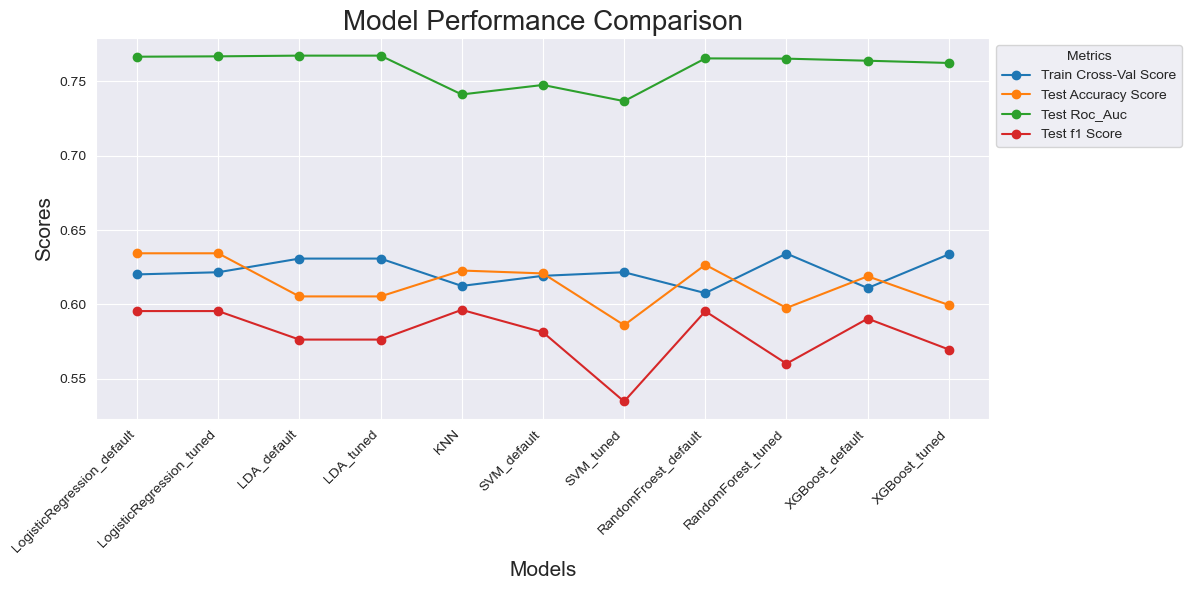

In [239]:
fig, ax = plt.subplots(figsize=(12, 6))

for column in ['Train Cross-Val Score', 'Test Accuracy Score', 'Test Roc_Auc', 'Test f1 Score']:
    ax.plot(df_results_plot['Model'], df_results_plot[column], marker='o', label=column)

ax.set_title("Model Performance Comparison", fontsize=20)
ax.set_ylabel("Scores", fontsize=15)
ax.set_xlabel("Models", fontsize=15)
ax.set_xticks(range(len(df_results_plot['Model'])))
ax.set_xticklabels(df_results_plot['Model'], rotation=45, ha='right', fontsize=10)
ax.legend(title="Metrics", bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
sns.set_style('darkgrid')
ax.grid(True)
plt.tight_layout()
plt.show()

In [238]:
df_results

,Train Cross-Val Score,Test Accuracy Score,Train Roc_Auc,Test Roc_Auc,Train f1 Score,Test f1 Score
Model,,,,,,
LogisticRegression_default,0.620221,0.634429,0.773574,0.766667,0.599001,0.595560
LogisticRegression_tuned,0.621674,0.634429,0.773620,0.766910,0.599992,0.595560
LDA_default,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
LDA_tuned,0.630865,0.605416,0.772108,0.767393,0.606125,0.576380
KNN,0.612477,0.622824,0.813885,0.741279,0.646744,0.596375
SVM_default,0.619262,0.620890,0.774671,0.747657,0.610126,0.581319
SVM_tuned,0.621681,0.586074,0.757978,0.736769,0.570227,0.534741
RandomFroest_default,0.607643,0.626692,0.821413,0.765531,0.644958,0.595439
RandomForest_tuned,0.634254,0.597679,0.798901,0.765361,0.616658,0.560172


# Conclusion:
### `Train Cross-Validation Score:`
- The Train Cross-Val Score is generally consistent across models, with the __tuned versions of RandomForest (0.6342) and XGBoost (0.6337)__ achieving the highest scores.



### `Test Accuracy Scores:`
- The Test Accuracy Score is highest for __LogisticRegression(default/tuned) at 0.6344__.
  
- Tree-based models like __RandomForest(default) at 0.6266 and XGBoost(default) at 0.6189__ perform slightly lower but remain competitive. However, they show signs of overfitting.



### `Test Roc_AUC Performance:`
- The Test Roc_AUC is relatively consistent across models, with __LogisticRegression(tuned) achieving the highest (0.7669)__, followed closely by __LDA(default/tuned) at 0.7673__.

- Tree-based models perform well but slightly lower than linear models, with __RandomForest(default) at 0.7655 and XGBoost(default) at 0.7639__.



### `Test F1 Scores:`
- __Linear Models:__ The highest Test F1 Score among linear models is achieved by __LogisticRegression(default) at 0.5955__.

- __Tree-Based Models:__ Among tree-based models, __RandomForest(default) at 0.5954__ performs the best, closely matching the performance of linear models. __XGBoost(tuned) at 0.5696__ lags slightly behind but remains competitive in comparison.



### `Tuning Impact:`
- __Minimal Impact for Linear Models:__ Tuning had little to no impact on the performance of linear models such as Logistic Regression and LDA, as both default and tuned versions produced nearly identical scores across all metrics.

- __Positive Impact for Tree-Based Models:__ Hyperparameter tuning significantly improved the training performance of RandomForest and XGBoost, particularly in terms of Train Cross-Val Score and Train Roc_AUC, though the gains in test performance were less pronounced, indicating potential overfitting.


## `Model-Specific Observations:`
### __`LogisticRegression (default/tuned)`__ performs the best overall, with balanced scores across all metrics. 
### However, __`RandomForest(tuned) and XGBoost(tuned)`__ offer competitive results, especially in terms of Train Roc_AUC and F1 Scores. Further attention to overfitting in tree-based models may help improve generalization.
### After applying __`SMOTE`__ to address the imbalanced data, the recall for the minority class improved; however, it caused a decline in recall scores for the other two classes. Additional techniques are needed to enhance the overall model performance and maintain balanced recall across all classes.
